# 1. Import libraries and read the Dataset

In [1]:
# Importing the Libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
pd.set_option('display.max_columns',False)
pd.set_option('display.max_rows',False)

In [3]:
df = pd.read_csv('Country-data.csv')

# 2. Inspection and Data transformation

In [4]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df.shape

(167, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
# checking for null values
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
# descriptive analysis 
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [9]:
# Duplicates check
df.duplicated(subset = ['country'], keep = False).sum()

0

#### There are no null values or duplicates in the dataset

#### In the dataset provided, imports,exports and health features have the percentage of money spent or gained from these sectors from the total gdpp. So,values in imports, exports and health are converted to absolute values.

In [10]:
# Converting imports, exports and health spending percentages to absolute values.

df['imports'] = df['imports'] * df['gdpp']/100
df['exports'] = df['exports'] * df['gdpp']/100
df['health'] = df['health'] * df['gdpp']/100

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# 3. Exploratory Data Analysis

## 3.1. Univariate Analysis

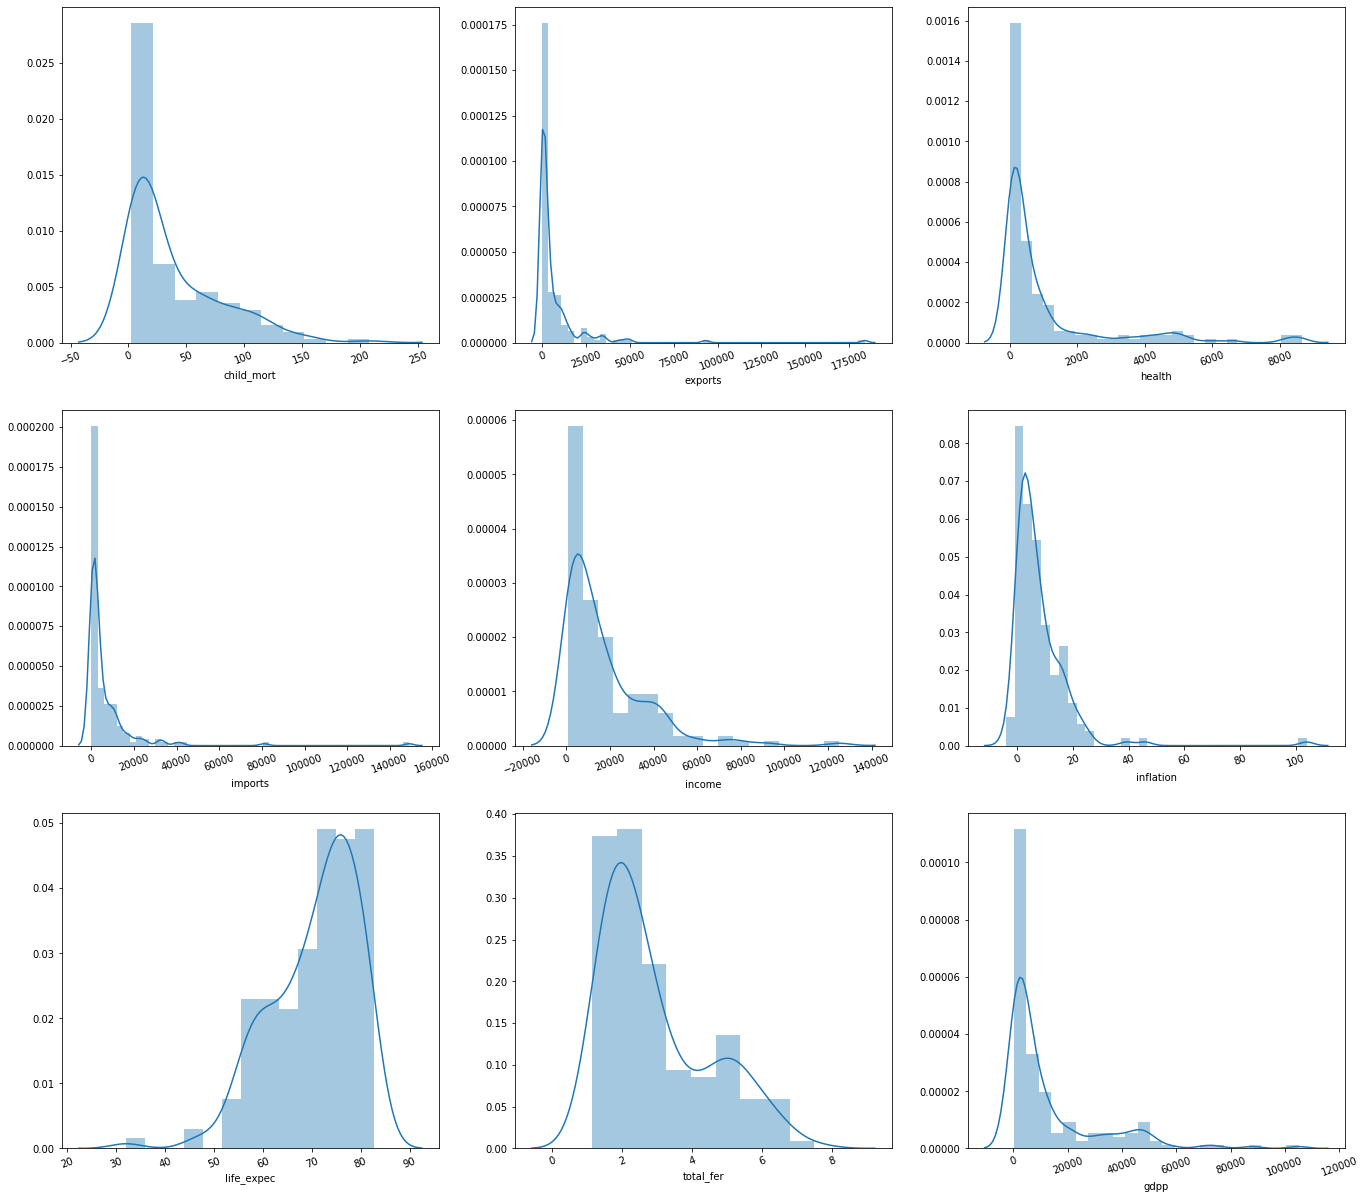

In [11]:
# plotting the distribution of different variables
plt.figure(figsize=(23, 21))
num_var = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(num_var):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(df[i[1]])
    plt.xticks(rotation=20)

##### Inference:
- Inflation has normal distribution
- All other variables do not follow normal distribution
- life_expec has left skewed and all other datapoint are Right Skewed.
- Variance is not uniform for all the data points.
- Range is not same for all data points.


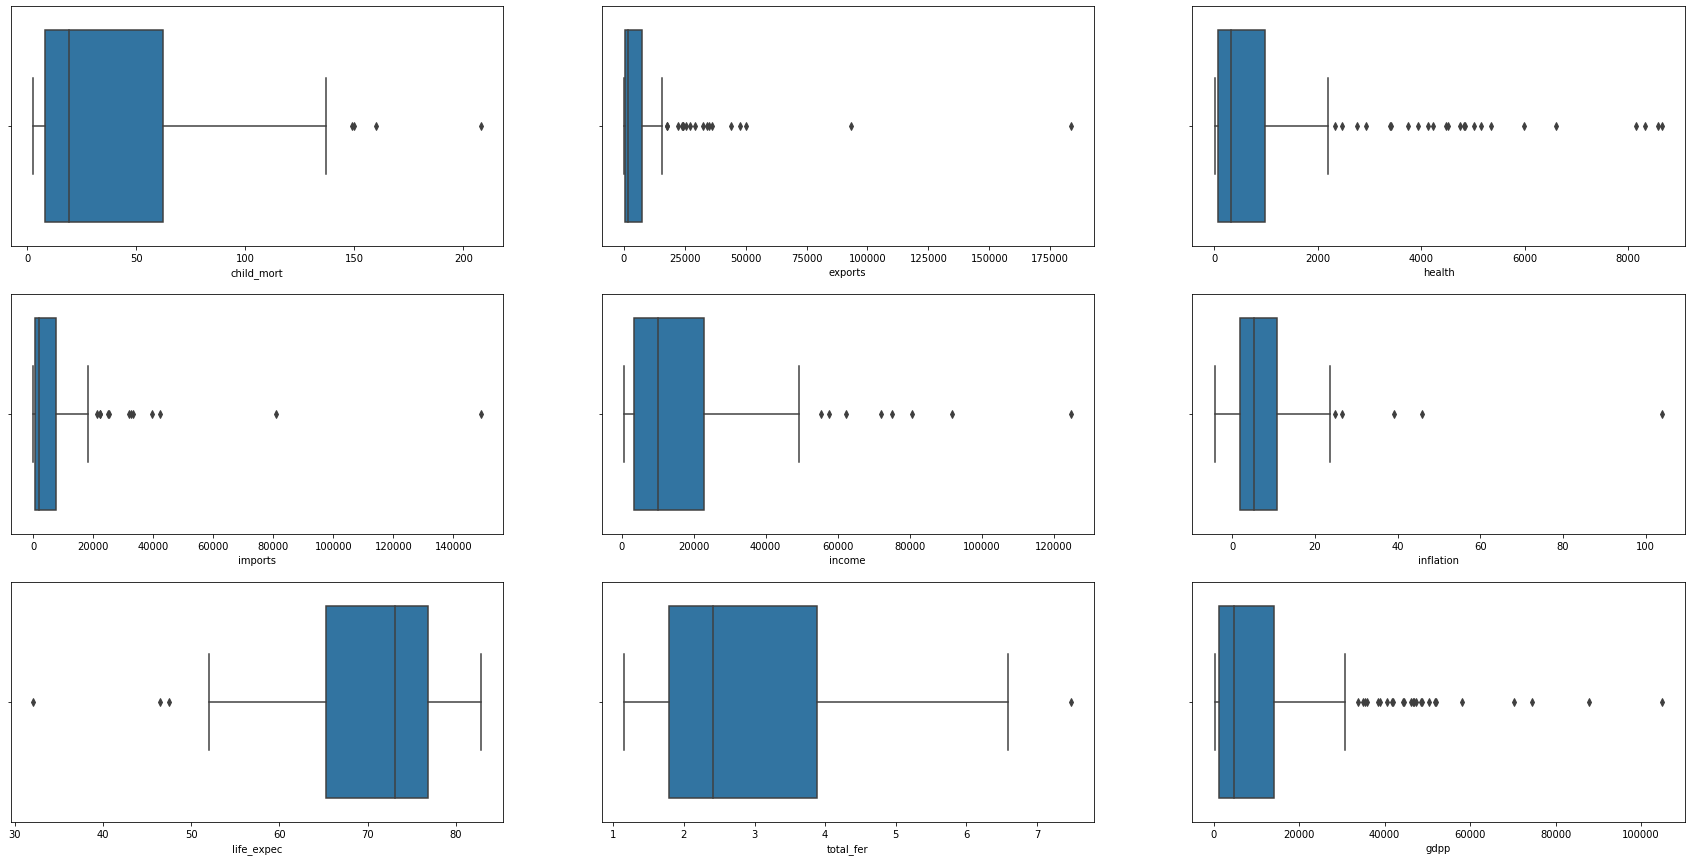

In [12]:
# boxplot of all the features
plt.figure(figsize = (30,15))
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features): # first column is 'country'. So, dropped it.
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(df[i[1]])

##### Inference:
- We can see that all the variables have some sort of outliers present. 


## 3.2. Bivariate Analysis

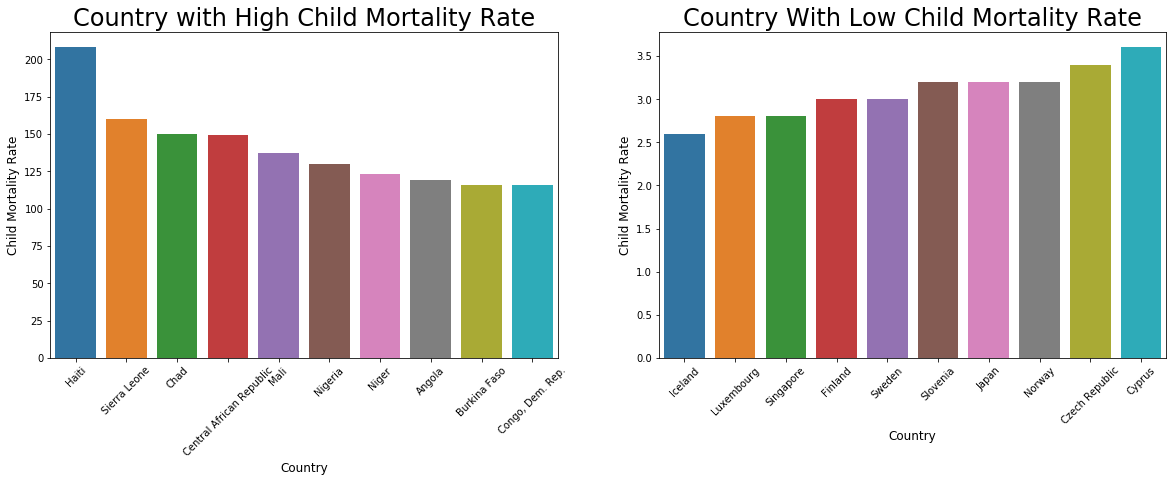

In [13]:
# Child Mortality Rate: Death of children under 5 years of age per 1000 live births
top_10_child_mort = df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
bottom_10_child_mort = df[['country','child_mort']].sort_values('child_mort', ascending = True).head(10)
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
chart = sns.barplot(top_10_child_mort.country, top_10_child_mort.child_mort)
chart.set_xlabel( "Country" , size = 12 )
chart.set_ylabel( "Child Mortality Rate" , size = 12 )
chart.set_title( "Country with High Child Mortality Rate" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

plt.subplot(1,2,2)
chart = sns.barplot(bottom_10_child_mort.country, bottom_10_child_mort.child_mort)
chart.set_xlabel( "Country" , size = 12 )
chart.set_ylabel( "Child Mortality Rate" , size = 12 )
chart.set_title( "Country With Low Child Mortality Rate" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

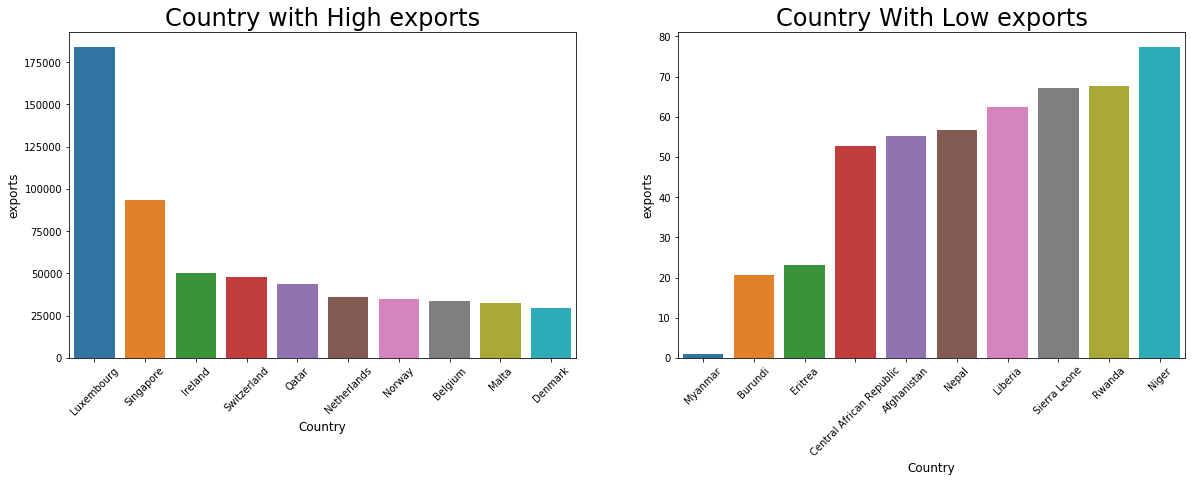

In [14]:
#Exports of goods and services per capita. 
top_10_exports = df[['country','exports']].sort_values('exports', ascending = False).head(10)
bottom_10_exports = df[['country','exports']].sort_values('exports', ascending = True).head(10)
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
chart = sns.barplot(top_10_exports.country, top_10_exports.exports)
chart.set_xlabel( "Country" , size = 12 )
chart.set_ylabel( "exports" , size = 12 )
chart.set_title( "Country with High exports" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

plt.subplot(1,2,2)
chart = sns.barplot(bottom_10_exports.country, bottom_10_exports.exports)
chart.set_xlabel( "Country" , size = 12 )
chart.set_ylabel( "exports" , size = 12 )
chart.set_title( "Country With Low exports" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

##### We can see that luxemburg has the highest exports and myanmar has the lowest exports

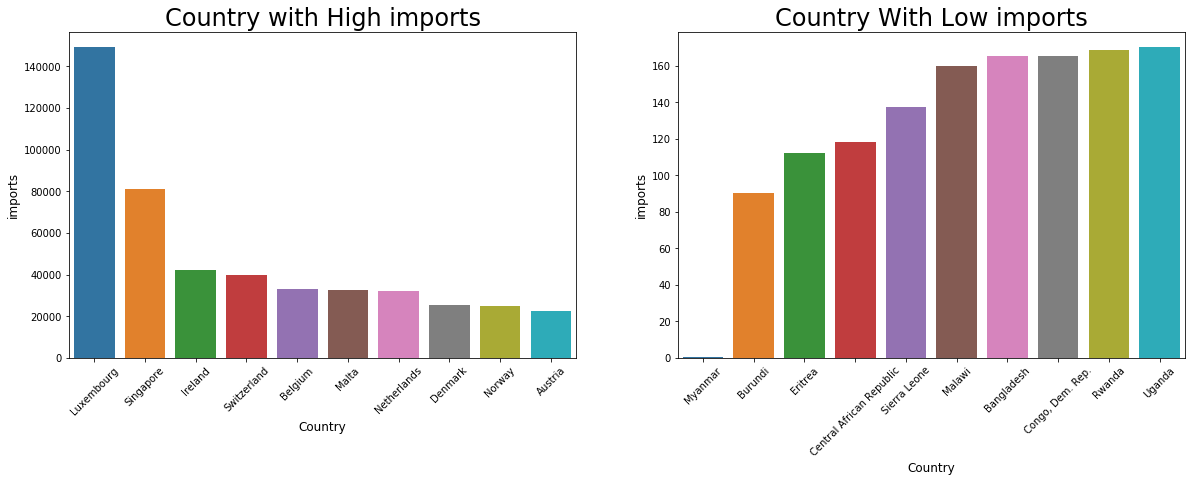

In [15]:
#Imports of goods and services per capita. 
top_10_imports = df[['country','imports']].sort_values('imports', ascending = False).head(10)
bottom_10_imports = df[['country','imports']].sort_values('imports', ascending = True).head(10)
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
chart = sns.barplot(top_10_imports.country, top_10_imports.imports)
chart.set_xlabel( "Country" , size = 12 )
chart.set_ylabel( "imports" , size = 12 )
chart.set_title( "Country with High imports" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

plt.subplot(1,2,2)
chart = sns.barplot(bottom_10_imports.country, bottom_10_imports.imports)
chart.set_xlabel( "Country" , size = 12 )
chart.set_ylabel( "imports" , size = 12 )
chart.set_title( "Country With Low imports" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

##### We can see that luxemburg has the highest imports and myanmar has the lowest imports

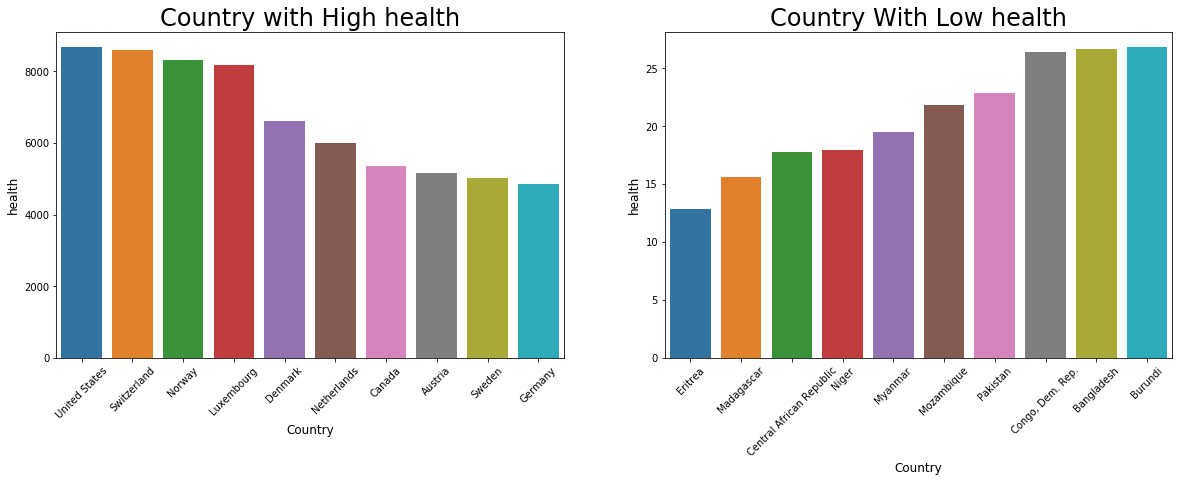

In [16]:
#Total health spending per capita
top_10_health = df[['country','health']].sort_values('health', ascending = False).head(10)
bottom_10_health = df[['country','health']].sort_values('health', ascending = True).head(10)
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
chart = sns.barplot(top_10_health.country, top_10_health.health)
chart.set_xlabel( "Country" , size = 12 )
chart.set_ylabel( "health" , size = 12 )
chart.set_title( "Country with High health" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

plt.subplot(1,2,2)
chart = sns.barplot(bottom_10_health.country, bottom_10_health.health)
chart.set_xlabel( "Country" , size = 12 )
chart.set_ylabel( "health" , size = 12 )
chart.set_title( "Country With Low health" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

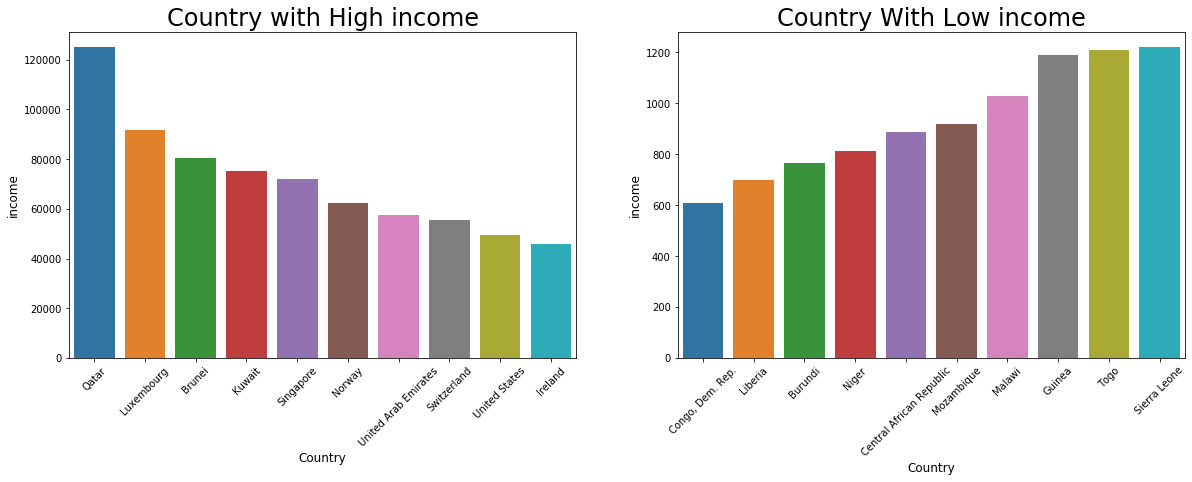

In [17]:
#top 10/bottom 10 Net income per person 
top_10_income = df[['country','income']].sort_values('income', ascending = False).head(10)
bottom_10_income = df[['country','income']].sort_values('income', ascending = True).head(10)
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
chart = sns.barplot(top_10_income.country, top_10_income.income)
chart.set_xlabel( "Country" , size = 12 )
chart.set_ylabel( "income" , size = 12 )
chart.set_title( "Country with High income" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

plt.subplot(1,2,2)
chart = sns.barplot(bottom_10_income.country, bottom_10_income.income)
chart.set_xlabel( "Country" , size = 12 )
chart.set_ylabel( "income" , size = 12 )
chart.set_title( "Country With Low income" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

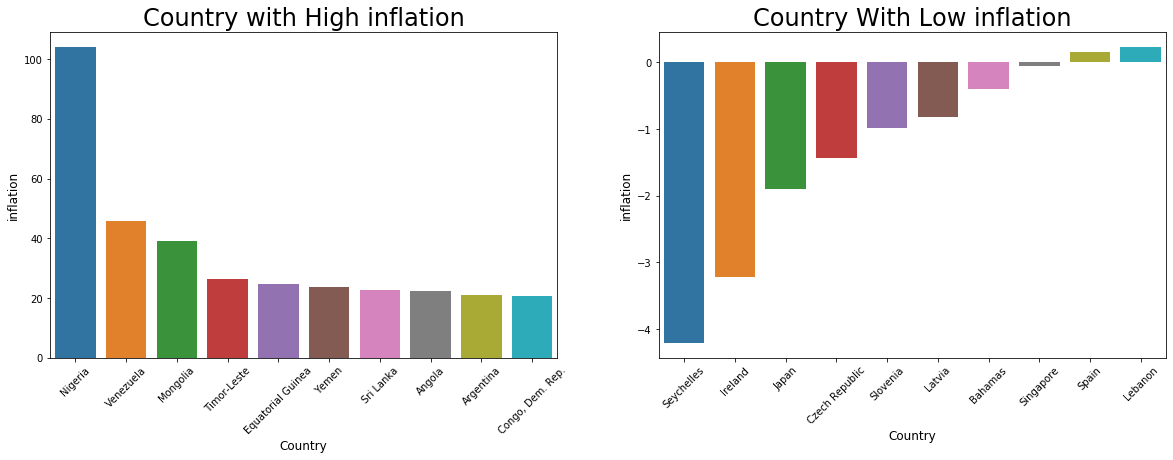

In [18]:
#The measurement of the annual growth rate of the Total GDP
top_10_inflation = df[['country','inflation']].sort_values('inflation', ascending = False).head(10)
bottom_10_inflation = df[['country','inflation']].sort_values('inflation', ascending = True).head(10)
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
chart = sns.barplot(top_10_inflation.country, top_10_inflation.inflation)
chart.set_xlabel( "Country" , size = 12 )
chart.set_ylabel( "inflation" , size = 12 )
chart.set_title( "Country with High inflation" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

plt.subplot(1,2,2)
chart = sns.barplot(bottom_10_inflation.country, bottom_10_inflation.inflation)
chart.set_xlabel( "Country" , size = 12 )
chart.set_ylabel( "inflation" , size = 12 )
chart.set_title( "Country With Low inflation" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

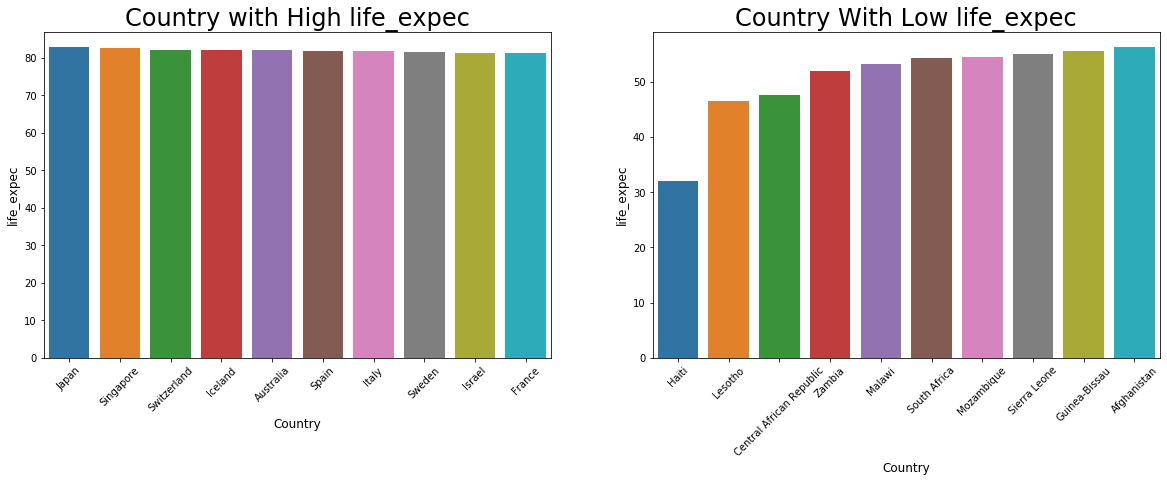

In [19]:
#The average number of years a new born child would live if the current mortality patterns are to remain the same
top_10_life_expec = df[['country','life_expec']].sort_values('life_expec', ascending = False).head(10)
bottom_10_life_expec = df[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
chart = sns.barplot(top_10_life_expec.country, top_10_life_expec.life_expec)
chart.set_xlabel( "Country" , size = 12 )
chart.set_ylabel( "life_expec" , size = 12 )
chart.set_title( "Country with High life_expec" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

plt.subplot(1,2,2)
chart = sns.barplot(bottom_10_life_expec.country, bottom_10_life_expec.life_expec)
chart.set_xlabel( "Country" , size = 12 )
chart.set_ylabel( "life_expec" , size = 12 )
chart.set_title( "Country With Low life_expec" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

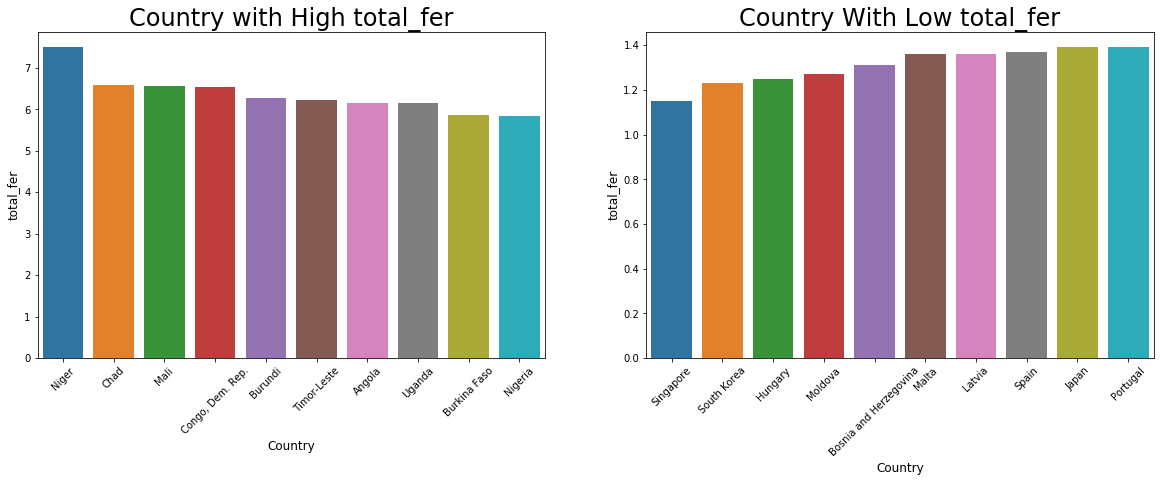

In [20]:
#The number of children that would be born to each woman if the current age-fertility rates remain the same.
top_10_total_fer = df[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
bottom_10_total_fer = df[['country','total_fer']].sort_values('total_fer', ascending = True).head(10)
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
chart = sns.barplot(top_10_total_fer.country, top_10_total_fer.total_fer)
chart.set_xlabel( "Country" , size = 12 )
chart.set_ylabel( "total_fer" , size = 12 )
chart.set_title( "Country with High total_fer" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

plt.subplot(1,2,2)
chart = sns.barplot(bottom_10_total_fer.country, bottom_10_total_fer.total_fer)
chart.set_xlabel( "Country" , size = 12 )
chart.set_ylabel( "total_fer" , size = 12 )
chart.set_title( "Country With Low total_fer" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

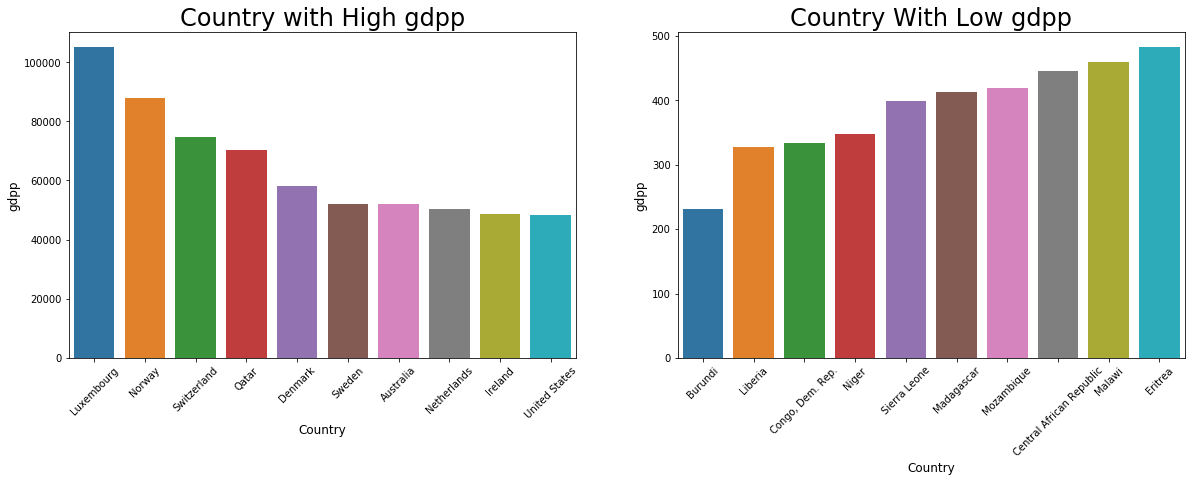

In [21]:
#The GDP per capita. Calculated as the Total GDP divided by the total population.

top_10_gdpp = df[['country','gdpp']].sort_values('gdpp', ascending = False).head(10)
bottom_10_gdpp = df[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
chart = sns.barplot(top_10_gdpp.country, top_10_gdpp.gdpp)
chart.set_xlabel( "Country" , size = 12 )
chart.set_ylabel( "gdpp" , size = 12 )
chart.set_title( "Country with High gdpp" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

plt.subplot(1,2,2)
chart = sns.barplot(bottom_10_gdpp.country, bottom_10_gdpp.gdpp)
chart.set_xlabel( "Country" , size = 12 )
chart.set_ylabel( "gdpp" , size = 12 )
chart.set_title( "Country With Low gdpp" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

## 3.3. Multivariate Analysis

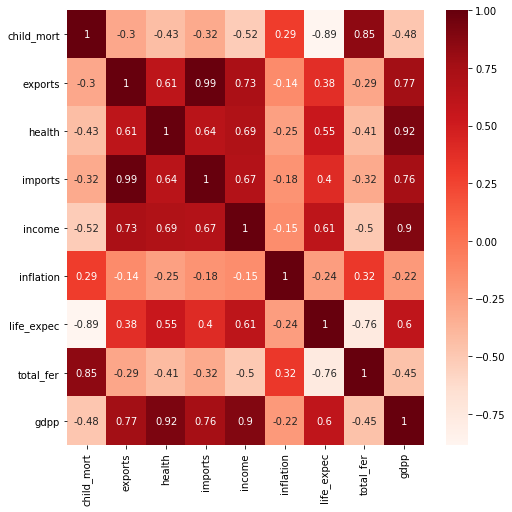

In [22]:
# heatmap of all features
plt.figure(figsize = (8,8))  
sns.heatmap(df.corr(),annot = True,cmap='Reds')

##### Inference:
- Imports and exports are highly correlated
- health and gdpp are highly correlated
- child mortality and total fertility are also highly correlated
- income and gdpp are also highly correlated


<Figure size 288x288 with 0 Axes>

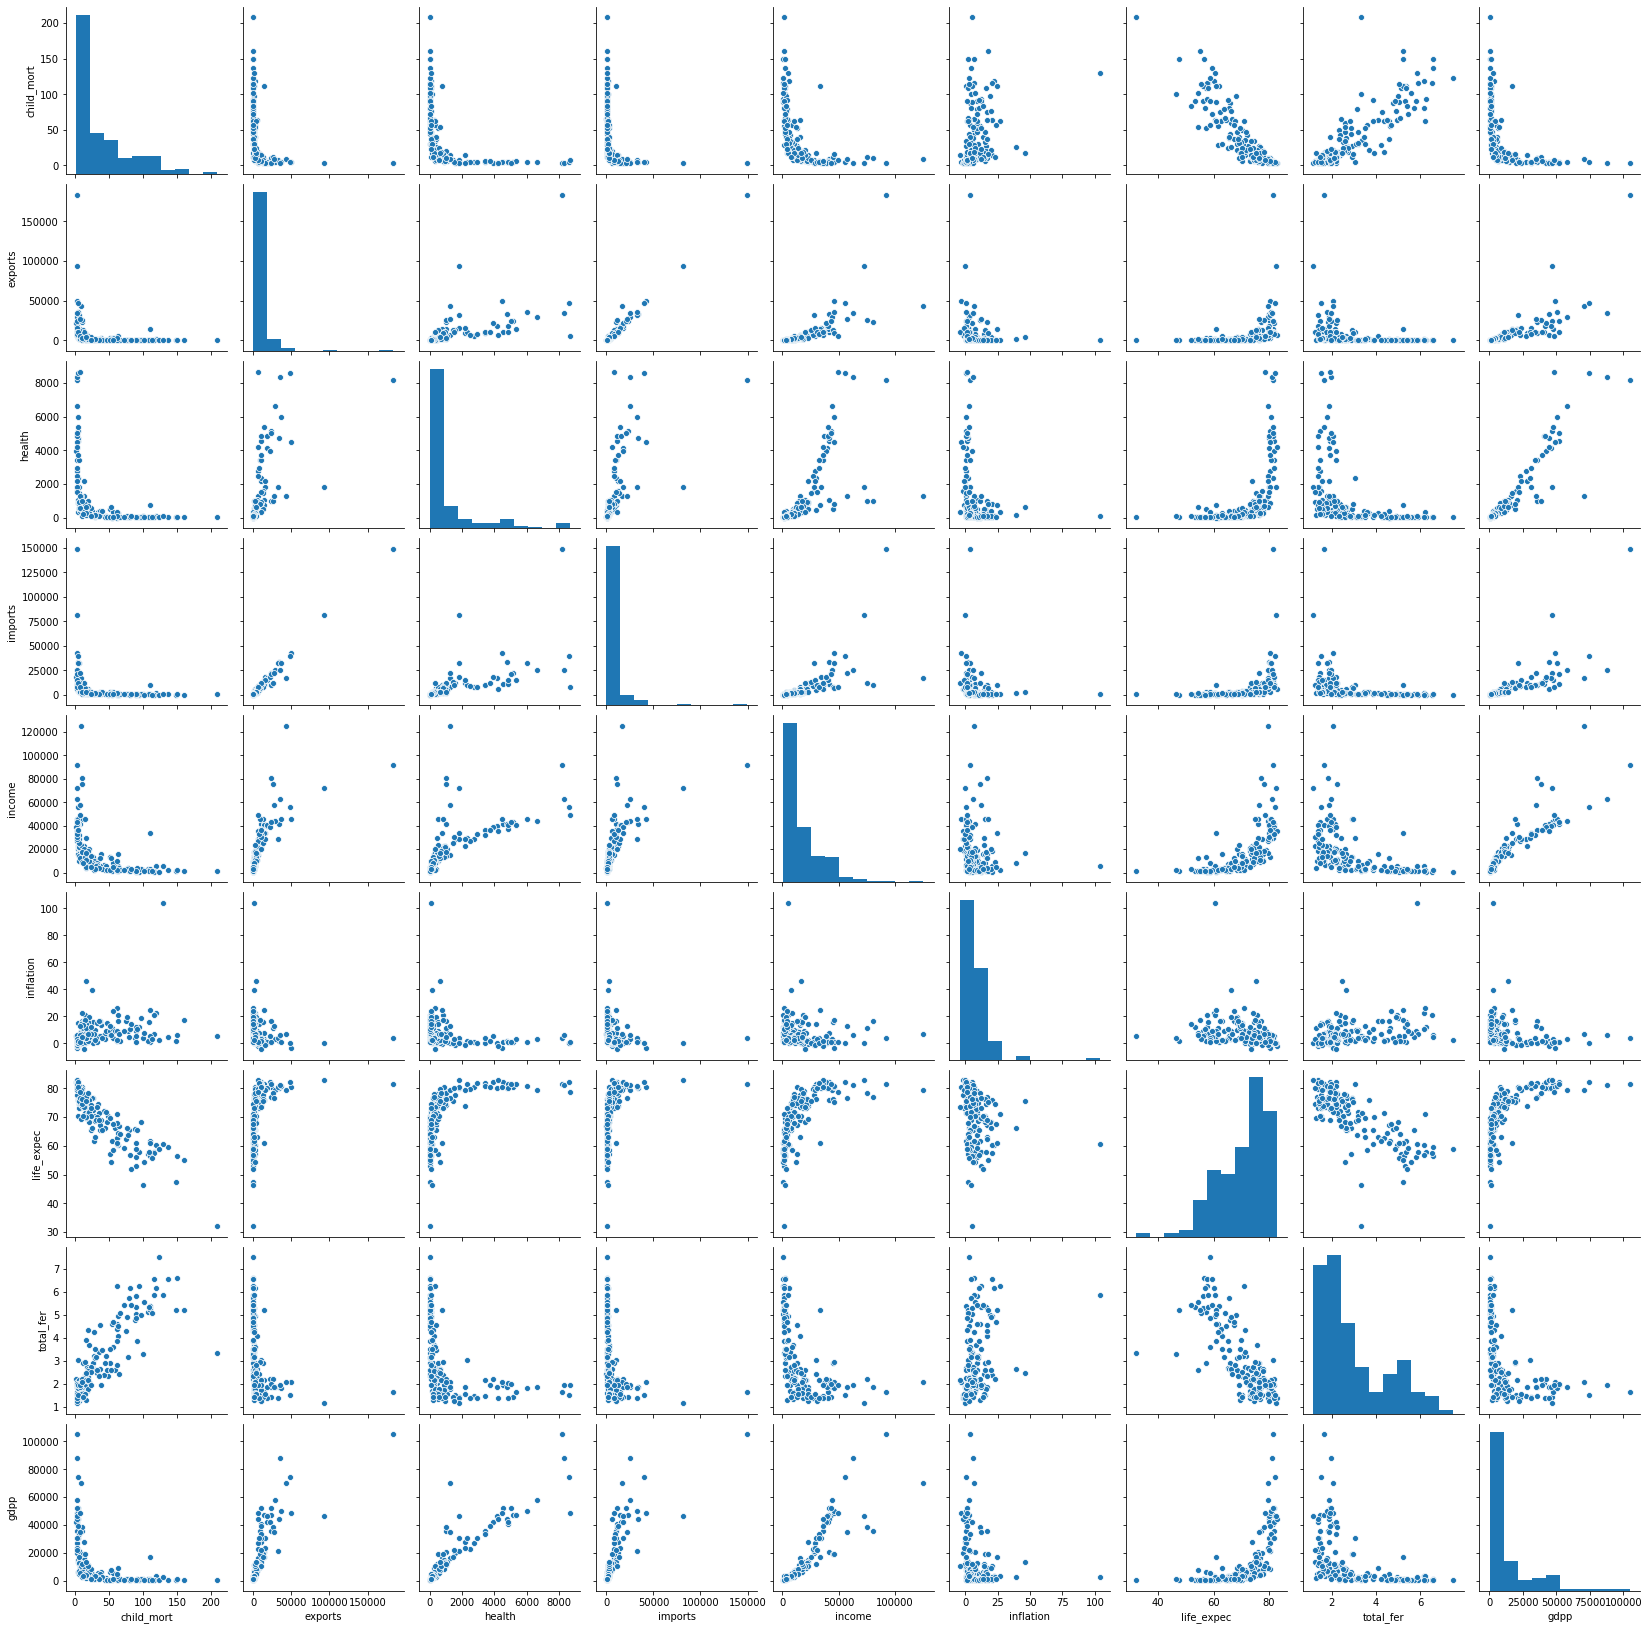

In [23]:
# pairplot of all features
plt.figure(figsize = (4,4))
sns.pairplot(df)
plt.show()

In [24]:
# set country as index of the dataset
df.set_index('country',inplace=True)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# 4. Data preparation 

## 4.1. Outlier Detection and Treatment

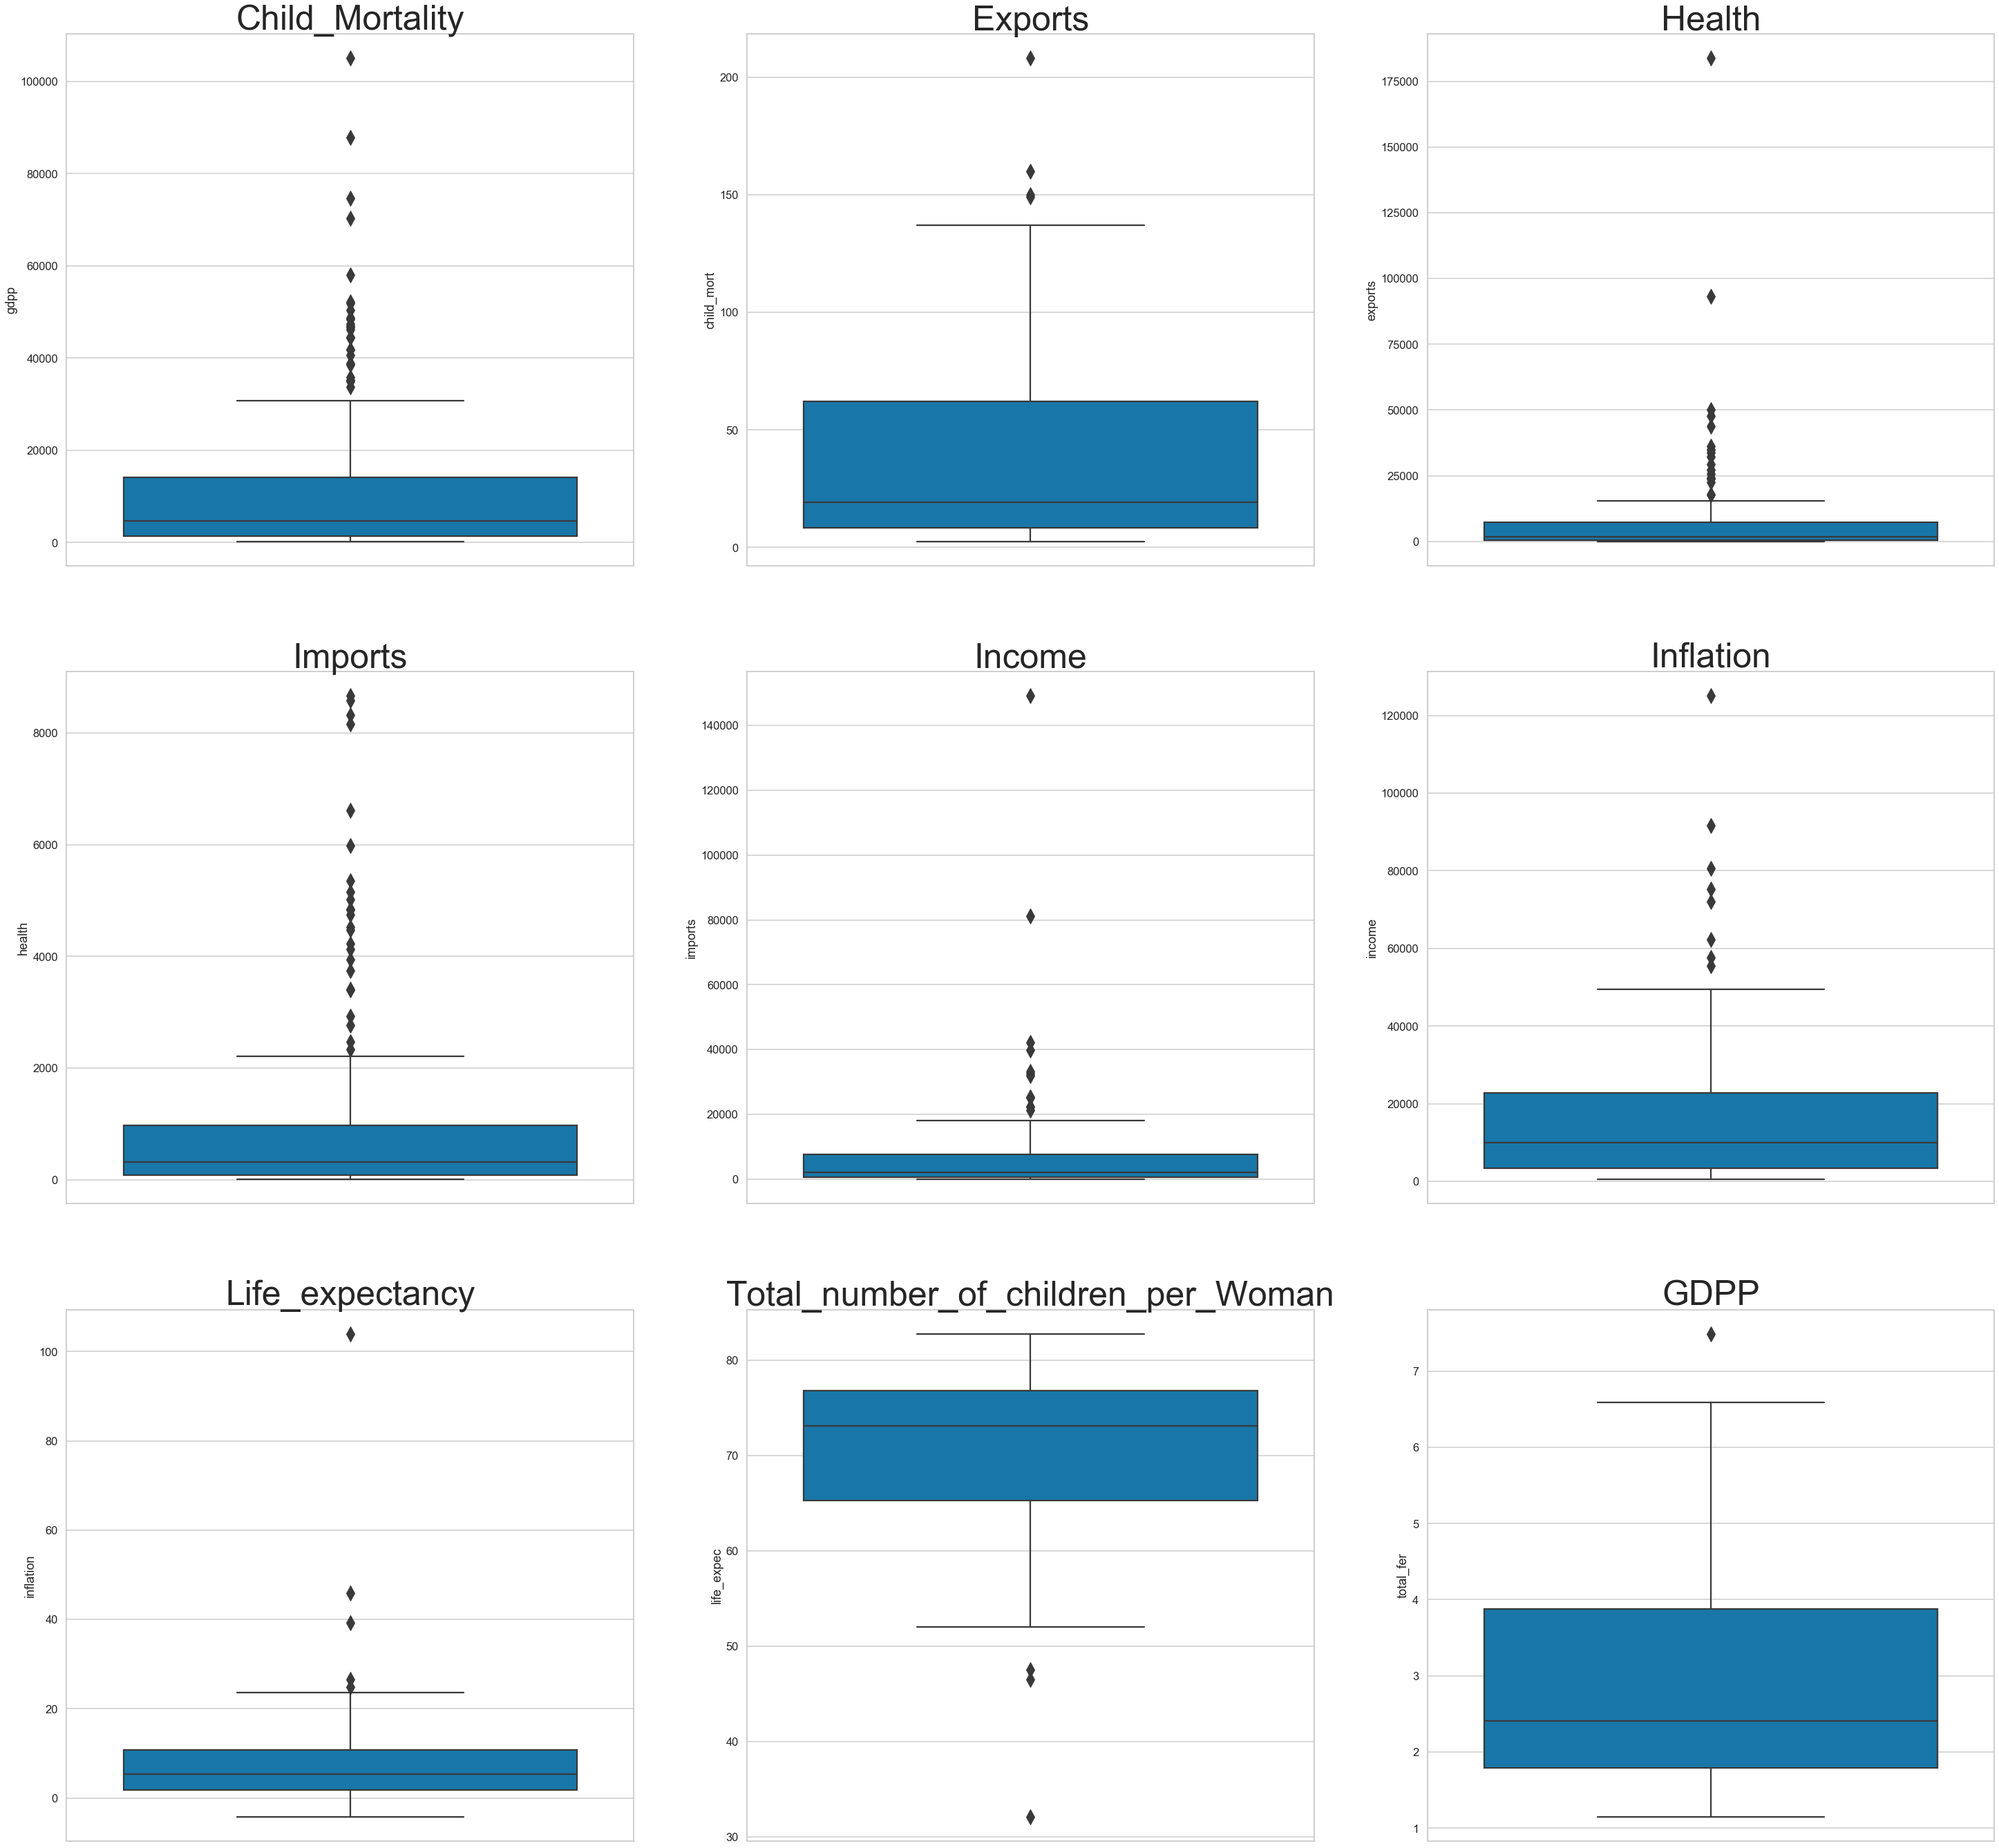

In [25]:

plt.figure(figsize=(50,150))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')

# Title names for the columns in the dataset

col={0:'Child_Mortality',1:'Exports',2:'Health',3:'Imports',4:'Income',5:'Inflation',
     6:'Life_expectancy',7:'Total_number_of_children_per_Woman',8:'GDPP'}

# Visualising the outliers with boxplot for all the variables 

for i in range(9):
    plt.subplot(9,3,i+1)
    plt.title(col[i],fontsize=50)
    sns.boxplot(x=df.columns[i-1],data=df,palette='winter_r',orient='v',fliersize=15)  #using boxplot

##### Inference: 
- Outliers are present in all features
- We can use the approach of soft capping to overcome the outlier treatment(i.e. removing datapoints which are above 0.99 percentile)
- Removing too many outliers might prove our analysis to be incorrect as we want to find the countries who need financial aid

In [26]:
#finding the 99th percentile value to cap
upper_gdpp = df['gdpp'].quantile(0.99)
upper_income = df['income'].quantile(0.99)
upper_health = df['health'].quantile(0.99)
upper_import = df['imports'].quantile(0.99)
upper_export = df['exports'].quantile(0.99)
upper_inflation = df['inflation'].quantile(0.99)

# capping the gdpp and income values
df['gdpp'][df['gdpp']>upper_gdpp] = upper_gdpp
df['income'][df['income']>upper_income] = upper_income
df['health'][df['health']>upper_health] = upper_health
df['imports'][df['imports']>upper_import] = upper_import
df['exports'][df['exports']>upper_export] = upper_export
df['inflation'][df['inflation']>upper_inflation]= upper_inflation

In [27]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,6538.214776,1054.206622,5873.135222,16857.550898,7.380970,70.555689,2.947964,12756.826347
std,40.328931,11415.308590,1790.845342,9422.700869,17957.012855,7.793224,8.893172,1.513848,17430.208938
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.800000,7.490000,79088.000000


## 4.2. Data Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
# Scaling the dataset with Standard Scaler 

scaled_df=scaler.fit_transform(df)
# converting the scaled data into a dataframe
scaled_df=pd.DataFrame(scaled_df,columns=df.columns)

scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.619092,1.902882,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.647866,-0.859973,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.670423,-0.038404,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.179234,2.128151,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.704258,-0.541946,-0.032042


# 4.3. Hopkins statistic

In [29]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [30]:
hopkins(scaled_df)

0.8999840612251672

##### Since hopkins statistic value is 0.89 which is above 0.7, we can say with confidence that clustering can be performed on the data

# 5. Model Building

# 5.1. K-means Clustering

In [31]:
import sklearn

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [32]:
kmeans = KMeans(n_clusters=5,max_iter=50)
kmeans.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [33]:
kmeans.labels_

array([2, 0, 0, 3, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 4, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 3, 3, 0, 2, 0, 1, 1,
       4, 0, 0, 0, 0, 3, 2, 0, 0, 1, 1, 3, 2, 0, 1, 3, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 3, 4, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 4, 0, 2, 2, 0, 0, 2, 1, 3, 0, 0, 0, 3, 0, 0, 2, 0, 2, 0,
       4, 1, 2, 3, 4, 0, 2, 0, 0, 0, 0, 0, 1, 4, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 4, 1, 1, 2, 2, 1, 1, 0, 0, 3, 0, 1, 4, 0, 2, 0, 3, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 3, 0, 3, 2])

## 5.1.1. Elbow curve/SSD

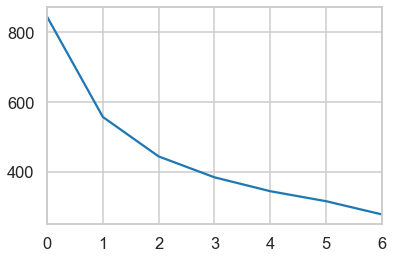

In [34]:
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(scaled_df)
    
    ssd.append(kmeans.inertia_)
    
plt.xlim(0,6)
plt.plot(ssd)

## 5.1.2. Silhouette Score

In [35]:
range_n_clusters = [2,3,4,5,6,7,8]
silhouette_scores_list = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(scaled_df)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(scaled_df,cluster_labels)
    silhouette_scores_list.append([num_clusters, silhouette_avg])
    print('for n_clusters={0}, the silhoutte score is {1}'.format(num_clusters,silhouette_avg))

for n_clusters=2, the silhoutte score is 0.46947544259980584
for n_clusters=3, the silhoutte score is 0.40278107264865964
for n_clusters=4, the silhoutte score is 0.39124170530454777
for n_clusters=5, the silhoutte score is 0.3835129636593182
for n_clusters=6, the silhoutte score is 0.2954151274646246
for n_clusters=7, the silhoutte score is 0.3114496265723125
for n_clusters=8, the silhoutte score is 0.25451656548933344


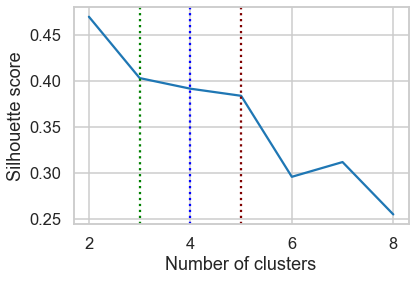

In [36]:
temp = pd.DataFrame(silhouette_scores_list)    
ax = plt.axes()
ax.plot(temp[0], temp[1])
ax.axvline(3, ls='dotted',color='green') # elbow formed as 3
ax.axvline(4, ls='dotted',color='blue') # elbow formed as 3
ax.axvline(5, ls='dotted',color='maroon') # elbow formed as 3
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

##### Inference :
- By looking silhouette analysis, we see that the peak is at range 3,4,5 and in sum of squared distances graph , we see that the elbow is in the range of 3 to 5
- Lets use K-means algorithm for values of k to be 3,4 & 5. And the check the result of  clustering.

## 5.1.3. K-Means Clustering with k=3

In [37]:
# K Means with with k=3
km_3 = KMeans(n_clusters=3, max_iter=500, init='k-means++', n_init=10, random_state= 0)
km_3.fit(scaled_df)
km_3.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 2, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [38]:
# making a copy of the original dataframe for kmeans clustering
df_km = df.copy()

In [39]:
df_km.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [40]:
# assigning the labels to the new dataframe
df_km["Km_3_Label"] = km_3.labels_
df_km.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Km_3_Label
country,,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [41]:
# checking the cluster count
df_km["Km_3_Label"].value_counts()

1    90
0    48
2    29
Name: Km_3_Label, dtype: int64

In [42]:
# checking which countries belong to cluster 0
df_km[df_km['Km_3_Label'] == 0]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Km_3_Label
country,,,,,,,,,,
Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0
Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0
Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,0
Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,0
Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0
Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231.0,0
Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.11,1310.0,0
Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,0
Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.59,897.0,0


In [43]:
# checking which countries belong to cluster 1
df_km[df_km['Km_3_Label'] == 1]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Km_3_Label
country,,,,,,,,,,
Albania,16.6,1145.200,267.8950,1987.740,9930.0,4.490,76.3,1.65,4090.0,1
Algeria,27.3,1712.640,185.9820,1400.440,12900.0,16.100,76.5,2.89,4460.0,1
Antigua and Barbuda,10.3,5551.000,735.6600,7185.800,19100.0,1.440,76.8,2.13,12200.0,1
Argentina,14.5,1946.700,834.3000,1648.000,18700.0,20.900,75.8,2.37,10300.0,1
Armenia,18.1,669.760,141.6800,1458.660,6700.0,7.770,73.3,1.69,3220.0,1
Azerbaijan,39.2,3171.120,343.3920,1208.880,16000.0,13.800,69.1,1.92,5840.0,1
Bahamas,13.8,9800.000,2209.2000,12236.000,22900.0,-0.393,73.8,1.86,28000.0,1
Bahrain,8.6,14386.500,1028.7900,10536.300,41100.0,7.440,76.0,2.16,20700.0,1
Bangladesh,49.4,121.280,26.6816,165.244,2440.0,7.140,70.4,2.33,758.0,1


In [44]:
# checking which countries belong to cluster 2
df_km[df_km['Km_3_Label'] == 2]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Km_3_Label
country,,,,,,,,,,
Australia,4.8,10276.20,4530.8700,10847.10,41400.0,1.160,82.0,1.93,51900.0,2
Austria,4.3,24059.70,5159.0000,22418.20,43200.0,0.873,80.5,1.44,46900.0,2
Belgium,4.5,33921.60,4750.8000,33166.80,41100.0,1.880,80.0,1.86,44400.0,2
Brunei,10.5,23792.20,1002.5200,9884.00,80600.0,16.700,77.1,1.84,35300.0,2
Canada,5.6,13793.40,5356.2000,14694.00,40700.0,2.870,81.3,1.63,47400.0,2
Cyprus,3.6,15461.60,1838.7600,17710.00,33900.0,2.010,79.9,1.42,30800.0,2
Denmark,4.1,29290.00,6612.0000,25288.00,44000.0,3.220,79.5,1.87,58000.0,2
Finland,3.0,17879.40,4134.9000,17278.80,39800.0,0.351,80.0,1.87,46200.0,2
France,4.2,10880.80,4831.4000,11408.60,36900.0,1.050,81.4,2.03,40600.0,2


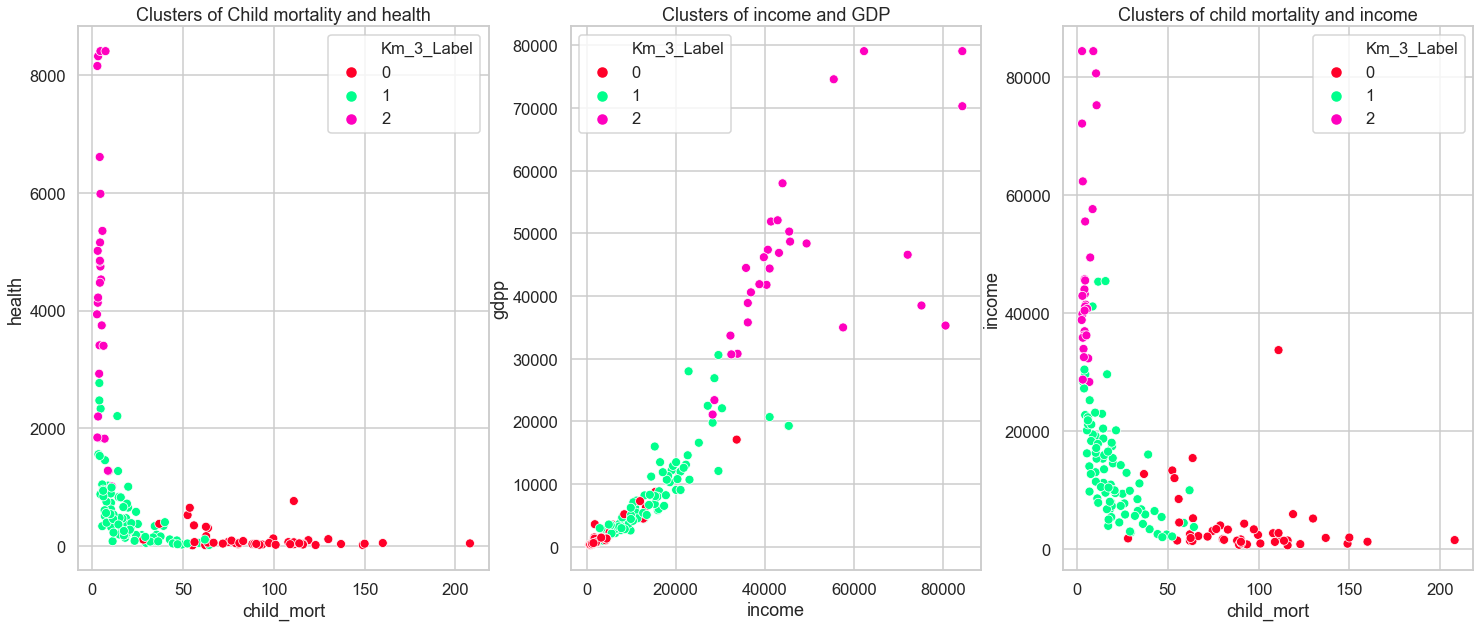

In [45]:
# EDA on the newly formed clusters considering variables child_mort, income and gdpp
fig, axes = plt.subplots(1,3, figsize=(25,10))
plt.subplot(1,3,1)
sns.scatterplot(x='child_mort', y='health', hue='Km_3_Label',data=df_km, palette='gist_rainbow')
plt.title('Clusters of Child mortality and health')
plt.subplot(1,3,2)
sns.scatterplot(x='income', y='gdpp', hue='Km_3_Label',data=df_km, palette='gist_rainbow')
plt.title('Clusters of income and GDP')
plt.subplot(1,3,3)
sns.scatterplot(x='child_mort', y='income', hue='Km_3_Label',data=df_km,palette='gist_rainbow')
plt.title('Clusters of child mortality and income')
plt.show()

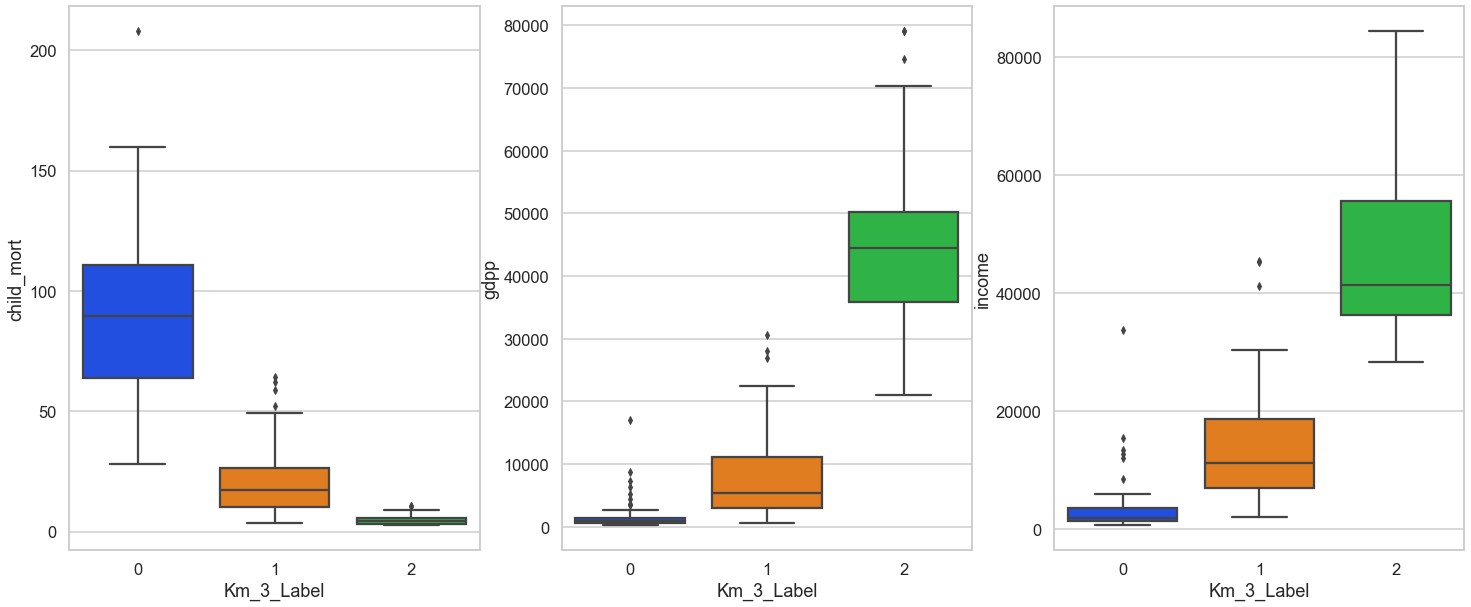

In [46]:
# EDA on the newly formed clusters considering variables child_mort, income and gdpp
plt.figure(figsize=(25, 10))
plt.subplot(1, 3, 1)
sns.boxplot(x='Km_3_Label', y='child_mort', data=df_km, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='Km_3_Label', y='gdpp', data=df_km, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='Km_3_Label', y='income', data=df_km, palette="bright")

plt.show() 

## 5.1.4. K-Means Clustering with k=4

In [47]:
# K Means with with k=4
km_4 = KMeans(n_clusters=4, max_iter=500, init='k-means++', n_init=10, random_state= 0)
km_4.fit(scaled_df)
km_4.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 3, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       3, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 3, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 3, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       3, 1, 0, 0, 3, 2, 0, 2, 2, 2, 2, 2, 1, 3, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 3, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 3, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [48]:
# assigning the labels to the new dataframe
df_km["Km_4_Label"] = km_4.labels_
df_km.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Km_3_Label,Km_4_Label
country,,,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1,2
Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1,2
Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1,2


In [49]:
# checking the cluster count
df_km["Km_4_Label"].value_counts()

2    82
0    48
1    28
3     9
Name: Km_4_Label, dtype: int64

In [50]:
# checking the countries which belong to cluster 3.
df_km[df_km['Km_4_Label'] == 3]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Km_3_Label,Km_4_Label
country,,,,,,,,,,,
Belgium,4.5,33921.60,4750.8000,33166.80,41100.0,1.880,80.0,1.86,44400.0,2,3
Denmark,4.1,29290.00,6612.0000,25288.00,44000.0,3.220,79.5,1.87,58000.0,2,3
Ireland,4.2,50161.00,4475.5300,42125.50,45700.0,-3.220,80.4,2.05,48700.0,2,3
Luxembourg,2.8,64794.26,8158.5000,55371.39,84374.0,3.620,81.3,1.63,79088.0,2,3
Netherlands,4.5,36216.00,5985.7000,31990.80,45500.0,0.848,80.7,1.79,50300.0,2,3
Norway,3.2,34856.60,8323.4400,25023.00,62300.0,5.950,81.0,1.95,79088.0,2,3
Qatar,9.0,43796.90,1272.4300,16731.40,84374.0,6.980,79.5,2.07,70300.0,2,3
Singapore,2.8,64794.26,1845.3600,55371.39,72100.0,-0.046,82.7,1.15,46600.0,2,3
Switzerland,4.5,47744.00,8410.3304,39761.80,55500.0,0.317,82.2,1.52,74600.0,2,3


##### These countries have a high income and high gdpp

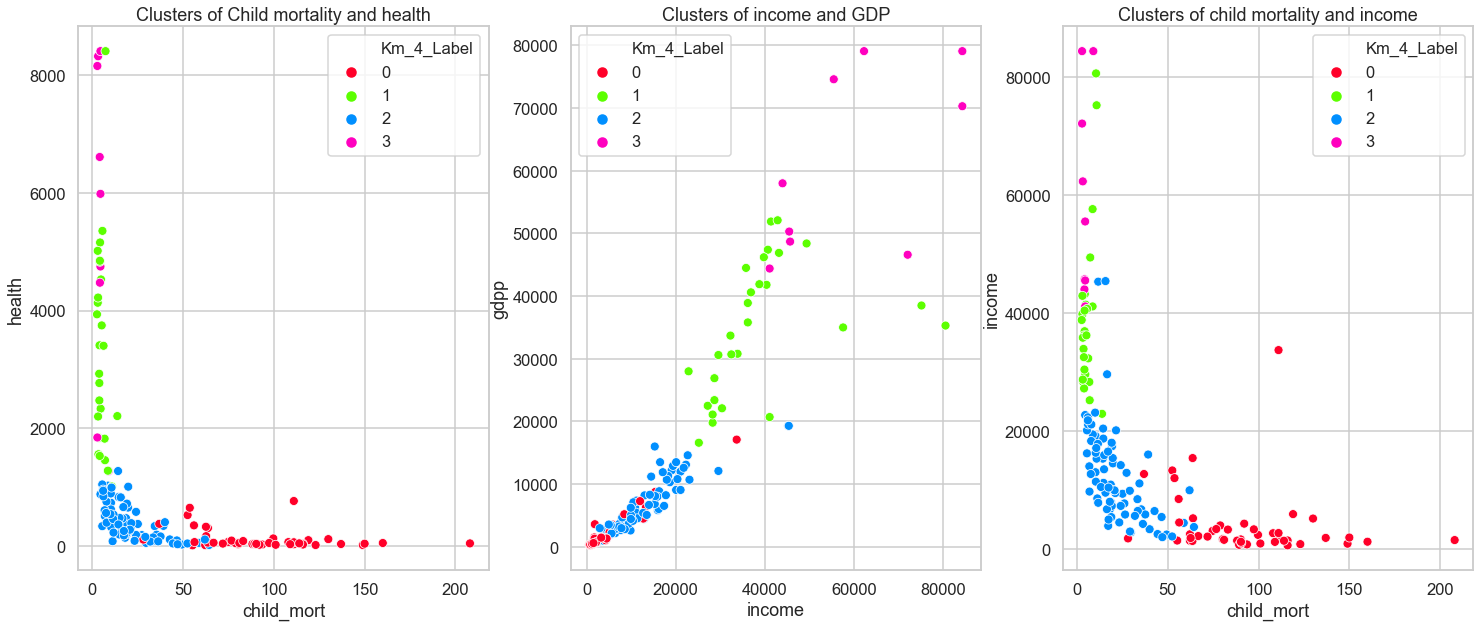

In [51]:
# EDA on the newly formed clusters considering variables child_mort, income and gdpp
fig, axes = plt.subplots(1,3, figsize=(25,10))
plt.subplot(1,3,1)
sns.scatterplot(x='child_mort', y='health', hue='Km_4_Label',data=df_km, palette='gist_rainbow')
plt.title('Clusters of Child mortality and health')
plt.subplot(1,3,2)
sns.scatterplot(x='income', y='gdpp', hue='Km_4_Label',data=df_km, palette='gist_rainbow')
plt.title('Clusters of income and GDP')
plt.subplot(1,3,3)
sns.scatterplot(x='child_mort', y='income', hue='Km_4_Label',data=df_km,palette='gist_rainbow')
plt.title('Clusters of child mortality and income')
plt.show()

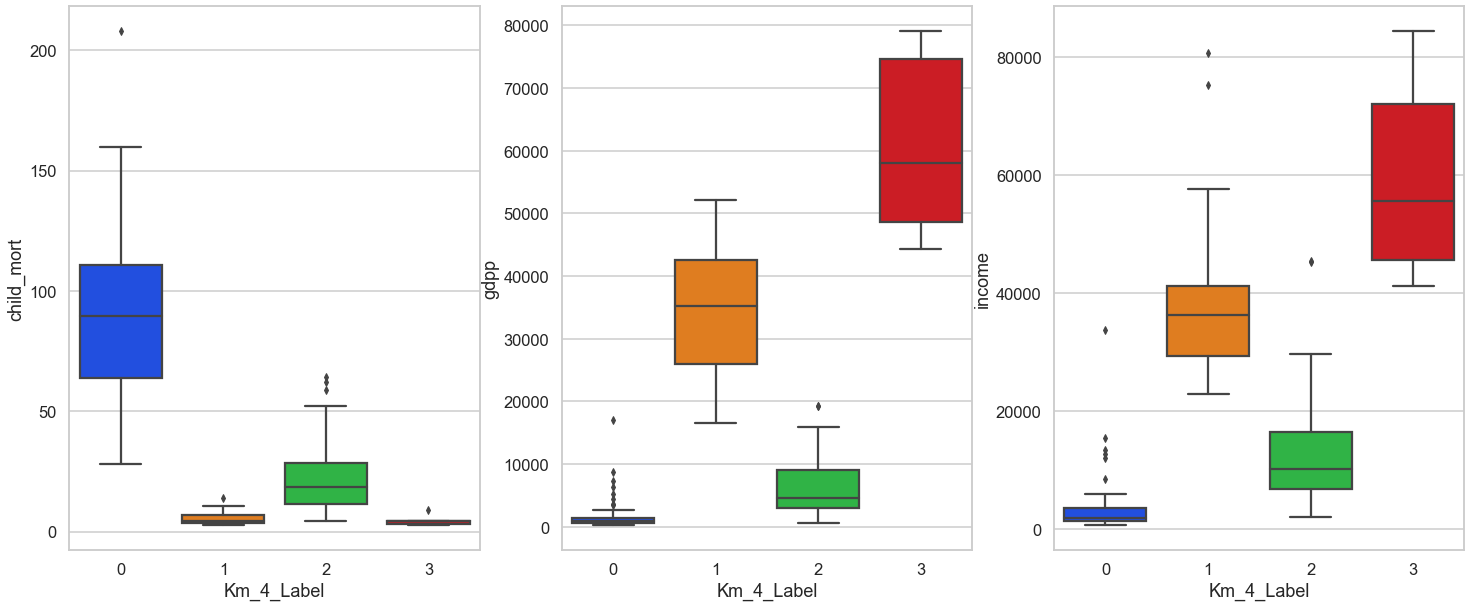

In [52]:
# EDA on the newly formed clusters considering variables child_mort, income and gdpp
plt.figure(figsize=(25, 10))
plt.subplot(1, 3, 1)
sns.boxplot(x='Km_4_Label', y='child_mort', data=df_km, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='Km_4_Label', y='gdpp', data=df_km, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='Km_4_Label', y='income', data=df_km, palette="bright")

plt.show() 

## 5.1.5. K-Means Clustering with k=5

In [53]:
# K Means with with k=5
km_5 = KMeans(n_clusters=5, max_iter=500, init='k-means++', n_init=10, random_state= 0)
km_5.fit(scaled_df)
km_5.labels_

array([2, 0, 0, 3, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 4, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 3, 3, 0, 2, 0, 1, 1,
       4, 0, 0, 0, 0, 3, 2, 0, 0, 1, 1, 3, 2, 0, 1, 3, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 3, 4, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 4, 0, 2, 2, 0, 0, 2, 1, 3, 0, 0, 0, 3, 0, 0, 2, 0, 2, 0,
       4, 1, 2, 3, 4, 0, 2, 0, 0, 0, 0, 0, 1, 4, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 4, 1, 1, 2, 2, 1, 1, 0, 0, 3, 0, 1, 4, 0, 2, 0, 3, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 3, 0, 3, 2])

In [54]:
# assigning the labels to the new dataframe
df_km["Km_5_Label"] = km_5.labels_
df_km.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Km_3_Label,Km_4_Label,Km_5_Label
country,,,,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0,2
Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1,2,0
Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1,2,0
Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0,3
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1,2,0


In [55]:
# checking count of the new clusters
df_km["Km_5_Label"].value_counts()

0    80
2    36
1    28
3    14
4     9
Name: Km_5_Label, dtype: int64

In [56]:
# checking countries in the cluster 4
df_km[df_km['Km_5_Label'] == 4]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Km_3_Label,Km_4_Label,Km_5_Label
country,,,,,,,,,,,,
Belgium,4.5,33921.60,4750.8000,33166.80,41100.0,1.880,80.0,1.86,44400.0,2,3,4
Denmark,4.1,29290.00,6612.0000,25288.00,44000.0,3.220,79.5,1.87,58000.0,2,3,4
Ireland,4.2,50161.00,4475.5300,42125.50,45700.0,-3.220,80.4,2.05,48700.0,2,3,4
Luxembourg,2.8,64794.26,8158.5000,55371.39,84374.0,3.620,81.3,1.63,79088.0,2,3,4
Netherlands,4.5,36216.00,5985.7000,31990.80,45500.0,0.848,80.7,1.79,50300.0,2,3,4
Norway,3.2,34856.60,8323.4400,25023.00,62300.0,5.950,81.0,1.95,79088.0,2,3,4
Qatar,9.0,43796.90,1272.4300,16731.40,84374.0,6.980,79.5,2.07,70300.0,2,3,4
Singapore,2.8,64794.26,1845.3600,55371.39,72100.0,-0.046,82.7,1.15,46600.0,2,3,4
Switzerland,4.5,47744.00,8410.3304,39761.80,55500.0,0.317,82.2,1.52,74600.0,2,3,4


##### These are the same countries which were in cluster 3 when we took k=4

In [57]:
# checking countries in the cluster 3
df_km[df_km['Km_5_Label'] == 3]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Km_3_Label,Km_4_Label,Km_5_Label
country,,,,,,,,,,,,
Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0,0,3
"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609.0,20.800,57.5,6.54,334.0,0,0,3
"Congo, Rep.",63.9,2331.740,67.4040,1498.780,5190.0,20.700,60.4,4.95,2740.0,0,0,3
Equatorial Guinea,111.0,14671.800,766.0800,10071.900,33700.0,24.900,60.9,5.21,17100.0,0,0,3
Gabon,63.7,5048.750,306.2500,1653.750,15400.0,16.600,62.9,4.08,8750.0,0,0,3
Ghana,74.7,386.450,68.3820,601.290,3060.0,16.600,62.2,4.27,1310.0,0,0,3
Iraq,36.9,1773.000,378.4500,1534.500,12700.0,16.600,67.2,4.56,4500.0,0,0,3
Mauritania,97.4,608.400,52.9200,734.400,3320.0,18.900,68.2,4.98,1200.0,0,0,3
Mongolia,26.1,1237.550,144.1600,1502.550,7710.0,39.200,66.2,2.64,2650.0,1,2,3


In [58]:
# checking countries in the cluster 2
df_km[df_km['Km_5_Label'] == 2]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Km_3_Label,Km_4_Label,Km_5_Label
country,,,,,,,,,,,,
Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0,0,2
Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,0,0,2
Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,0,0,2
Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0,0,2
Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231.0,0,0,2
Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.11,1310.0,0,0,2
Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,0,0,2
Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.59,897.0,0,0,2
Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.75,769.0,0,0,2


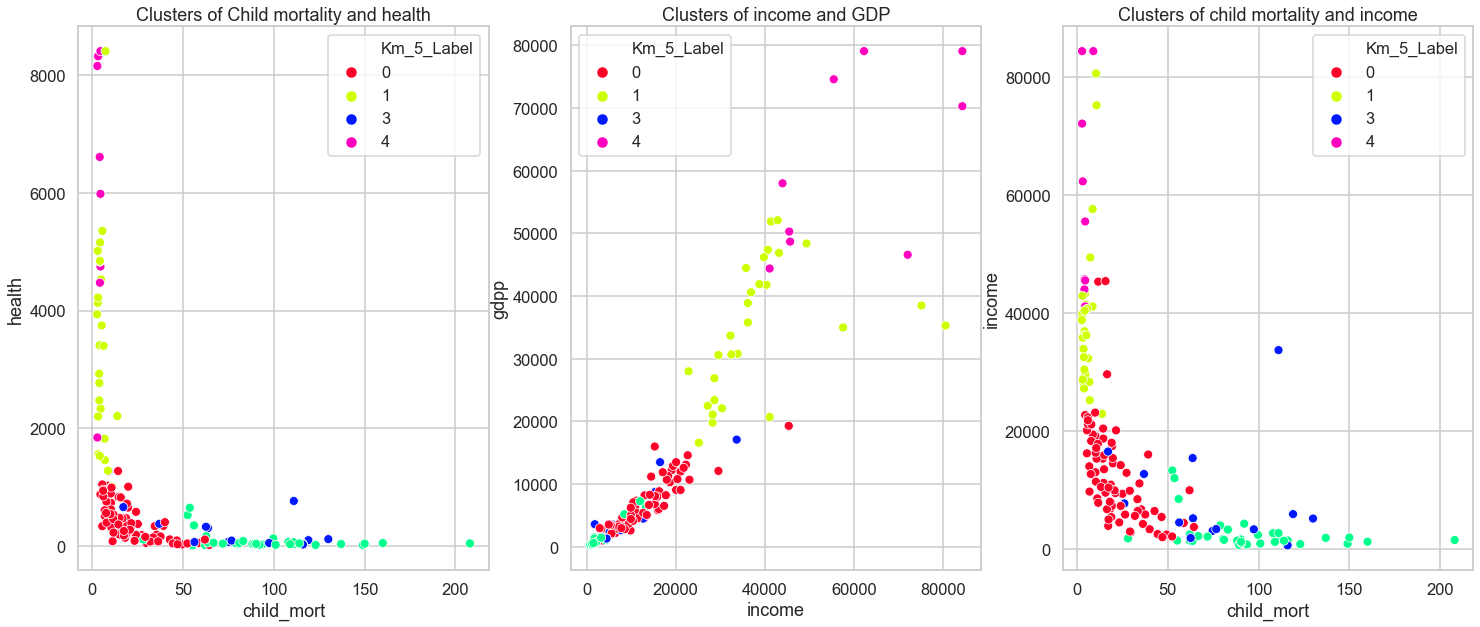

In [59]:
# EDA on the newly formed clusters considering variables child_mort, income and gdpp
fig, axes = plt.subplots(1,3, figsize=(25,10))
plt.subplot(1,3,1)
sns.scatterplot(x='child_mort', y='health', hue='Km_5_Label',data=df_km, palette='gist_rainbow')
plt.title('Clusters of Child mortality and health')
plt.subplot(1,3,2)
sns.scatterplot(x='income', y='gdpp', hue='Km_5_Label',data=df_km, palette='gist_rainbow')
plt.title('Clusters of income and GDP')
plt.subplot(1,3,3)
sns.scatterplot(x='child_mort', y='income', hue='Km_5_Label',data=df_km,palette='gist_rainbow')
plt.title('Clusters of child mortality and income')
plt.show()

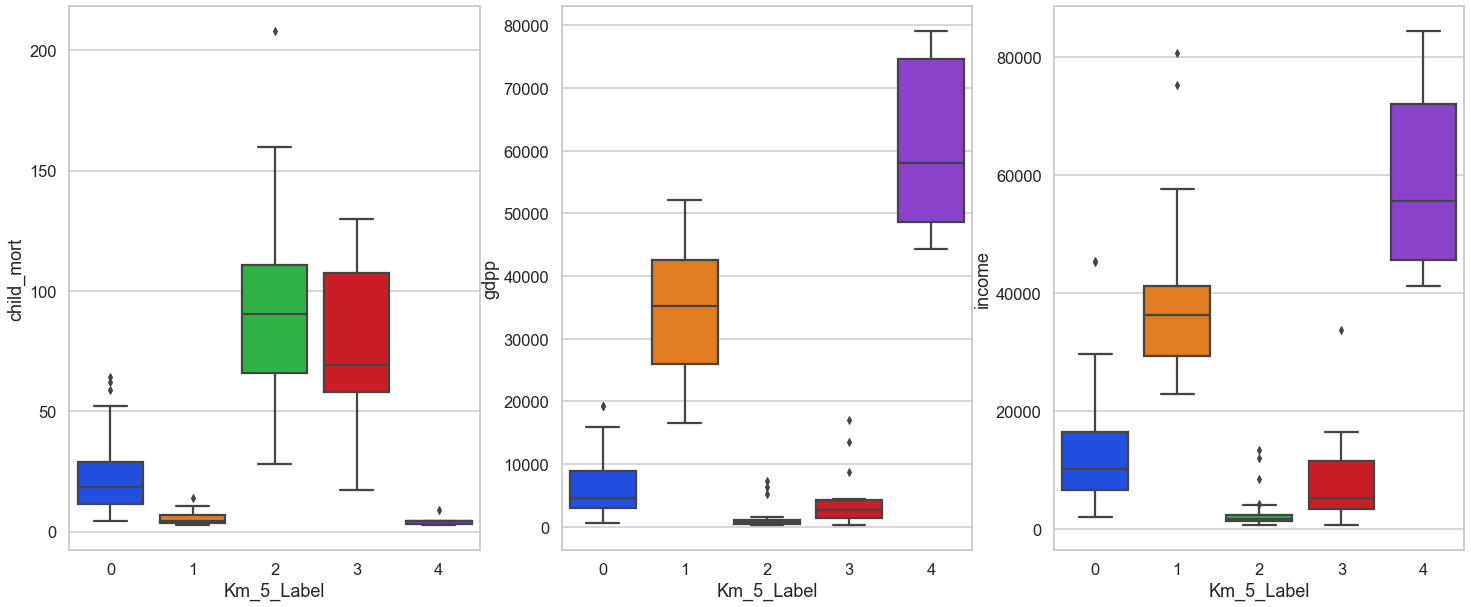

In [60]:
# EDA on the newly formed clusters considering variables child_mort, income and gdpp
plt.figure(figsize=(25, 10))
plt.subplot(1, 3, 1)
sns.boxplot(x='Km_5_Label', y='child_mort', data=df_km, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='Km_5_Label', y='gdpp', data=df_km, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='Km_5_Label', y='income', data=df_km, palette="bright")

plt.show() 

##### Inference:
- From the above analysis we can infer that k=3 is the optimal number of clusters required to segment the data
- So, for the final model, we will consider k=3 

# 5.1.6. K-Means Model interpretation with k=3

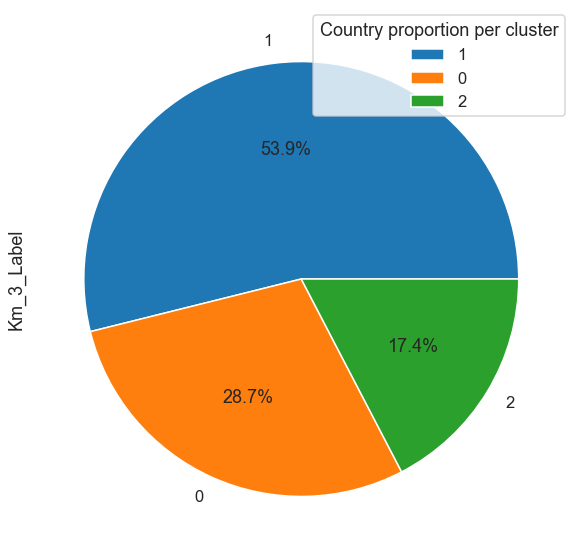

In [61]:
# Vizualising the Cluster
plt.figure(figsize=[15,10])
df_km["Km_3_Label"].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.legend(title = "Country proportion per cluster")
plt.show()

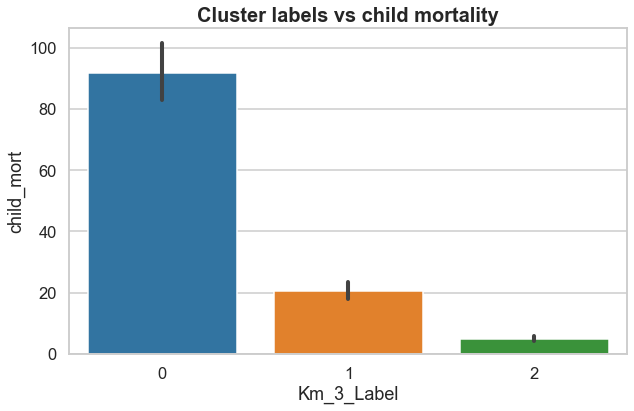

In [62]:
# plots
plt.figure(figsize = (10,6))
sns.barplot(x='Km_3_Label', y='child_mort', data=df_km)
plt.title('Cluster labels vs child mortality',fontweight="bold", size=20)

plt.show()

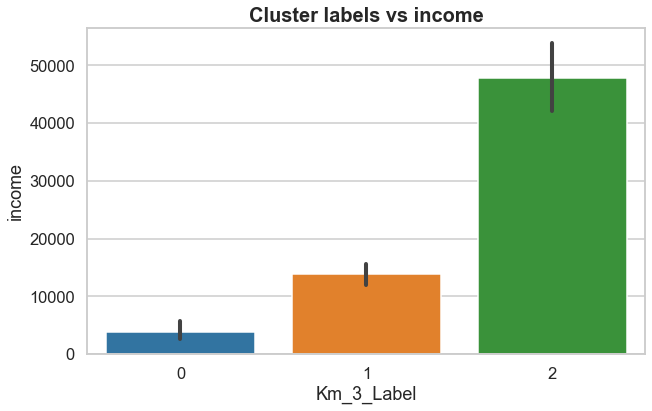

In [63]:
# plots
plt.figure(figsize = (10,6))
sns.barplot(x='Km_3_Label', y='income', data=df_km)
plt.title('Cluster labels vs income',fontweight="bold", size=20)

plt.show()

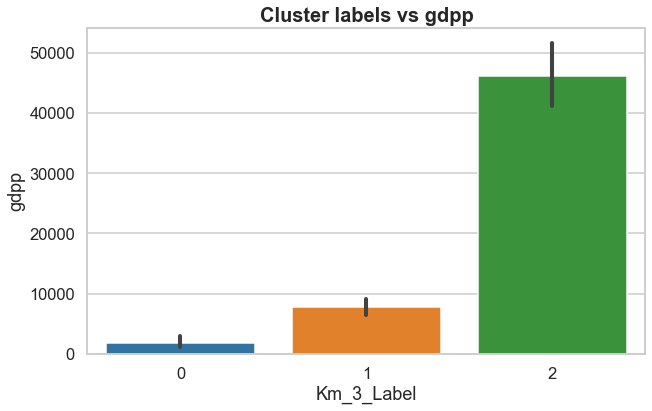

In [64]:
# plots
plt.figure(figsize = (10,6))
sns.barplot(x='Km_3_Label', y='gdpp', data=df_km)
plt.title('Cluster labels vs gdpp',fontweight="bold", size=20)

plt.show()

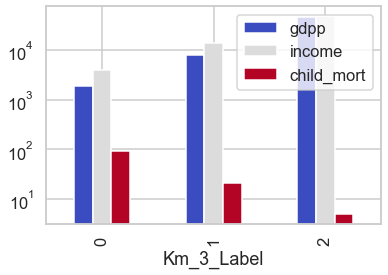

In [65]:
grouped_df = df_km[['gdpp', 'income', 'child_mort','Km_3_Label']].groupby('Km_3_Label').mean()
grouped_df.plot(kind='bar',logy=True, colormap='coolwarm')   

plt.show()

# 5.1.7.  K-Means clustering conclusion

In [66]:
# Renaming the clusters for better interpretability
df_km.loc[df_km['Km_3_Label'] == 0,'Km_3_Label'] ='Under-Developed Country'
df_km.loc[df_km['Km_3_Label'] == 1,'Km_3_Label'] ='Developing Country'
df_km.loc[df_km['Km_3_Label'] == 2,'Km_3_Label'] ='Developed Country'

In [67]:
df_km['Km_3_Label'].value_counts()

Developing Country         90
Under-Developed Country    48
Developed Country          29
Name: Km_3_Label, dtype: int64

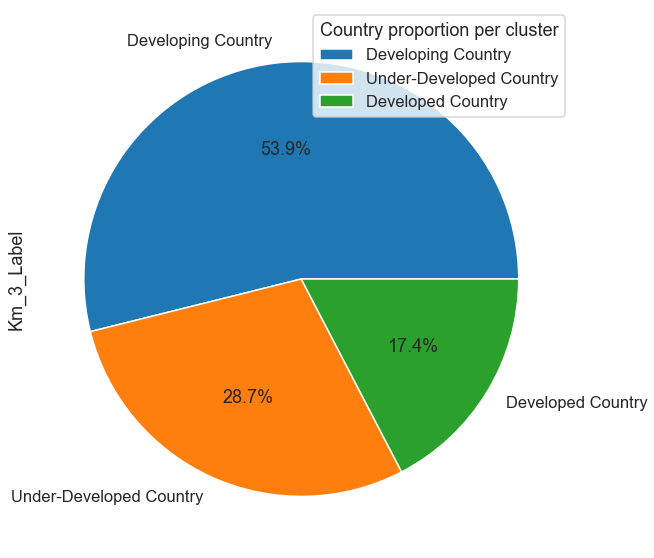

In [68]:
plt.figure(figsize=[15,10])
df_km["Km_3_Label"].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.legend(title = "Country proportion per cluster")
plt.show()

In [69]:
df_km.drop(["Km_4_Label","Km_5_Label"],axis = 1, inplace = True)

In [70]:
K_top5 = df_km[df_km['Km_3_Label'] == "Under-Developed Country"].sort_values(by = ['gdpp','child_mort','income'], ascending = [True, False, True]).head()
K_top5

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Km_3_Label
country,,,,,,,,,,
Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,Under-Developed Country
Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,Under-Developed Country
"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,Under-Developed Country
Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,Under-Developed Country
Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,Under-Developed Country


##### Conclusion: 
Looking at the graph we are certain that cluster 1 is our cluster of concern. Because:

1. It has highest child mortality
2. Lowest income
3. Highest Inflation
4. Compartively low life expectancy 
5. Highest total fertility 
6. Lowest gdpp.

As per K- means clustering, the country which are direst need of aid are:

1. Burundi
2. Liberia
3. Congo, Dem. Rep
4. Niger
5. Sierra Leone


# 5.2. Hierarchical Clustering

## 5.2.1 Single Linkage Hierarchical Clustering

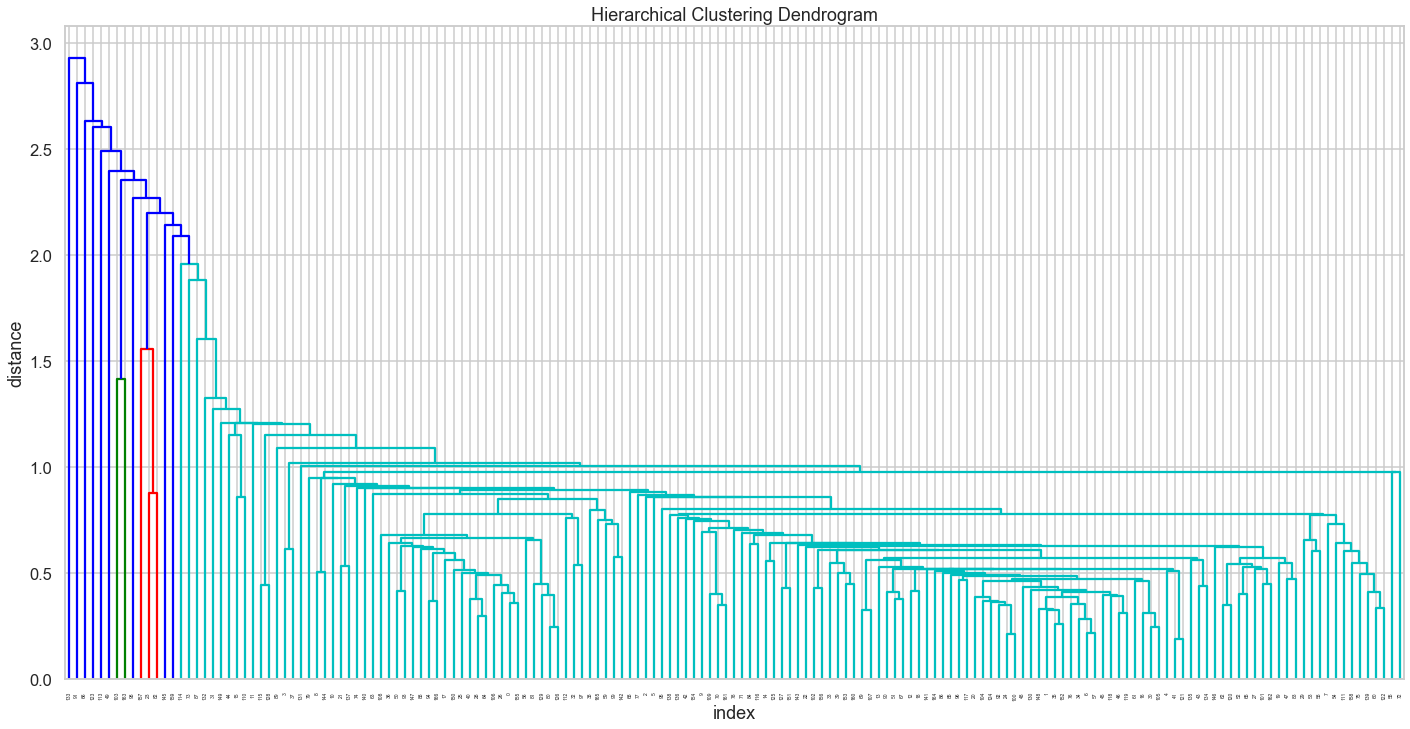

In [71]:
# single linkage: : Here, the distance between 2 clusters is defined as the shortest distance between points in the two clusters.

plt.figure(figsize=(24, 12))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
mergings_s = linkage(scaled_df, method="single", metric='euclidean')
dendrogram(mergings_s)
plt.show()

##### Inference :
- From the dendrogram above, we can se that single linkage hierarchical clustering is not the perfect option for clustering the data

## 5.2.2 Complete Linkage Hierarchical Clustering

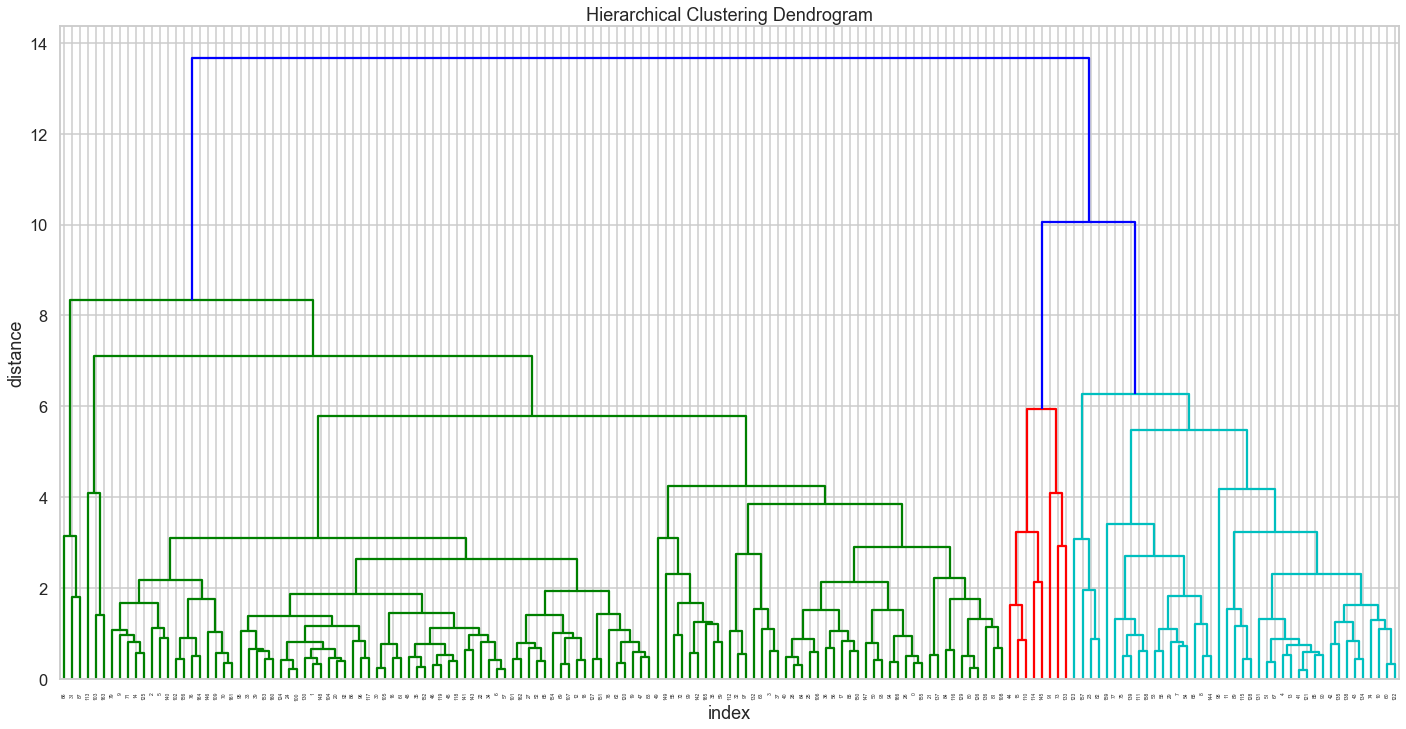

In [72]:
# complete linkage : Here, the distance between 2 clusters is defined as the maximum distance between any 2 points in the clusters

plt.figure(figsize=(24, 12))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
mergings_c = linkage(scaled_df, method="complete", metric='euclidean')
dendrogram(mergings_c)
plt.show()

##### Inference :
- Now we got the clear dendrogram and its easier to analyse the clusters. Lets consider a threshold value of 8. Draw the horizontal line at that height. It cuts 4 vertical lines, all of which represent a cluster.



## 5.2.3. Hierarchical Clustering with k=4

In [73]:
# 4 Cluster
her_cluster_4 = cut_tree(mergings_c, n_clusters=4).reshape(-1, )
her_cluster_4

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       3, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 3,
       0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [74]:
# make a copy of the original dataframe for hierarchical clustering
df_her = df.copy()
# assign cluster labels
df_her['her_cluster_4'] = her_cluster_4
df_her.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,her_cluster_4
country,,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [75]:
# checking count of countries after hierarchical clustering
df_her['her_cluster_4'].value_counts()

0    115
1     41
2      8
3      3
Name: her_cluster_4, dtype: int64

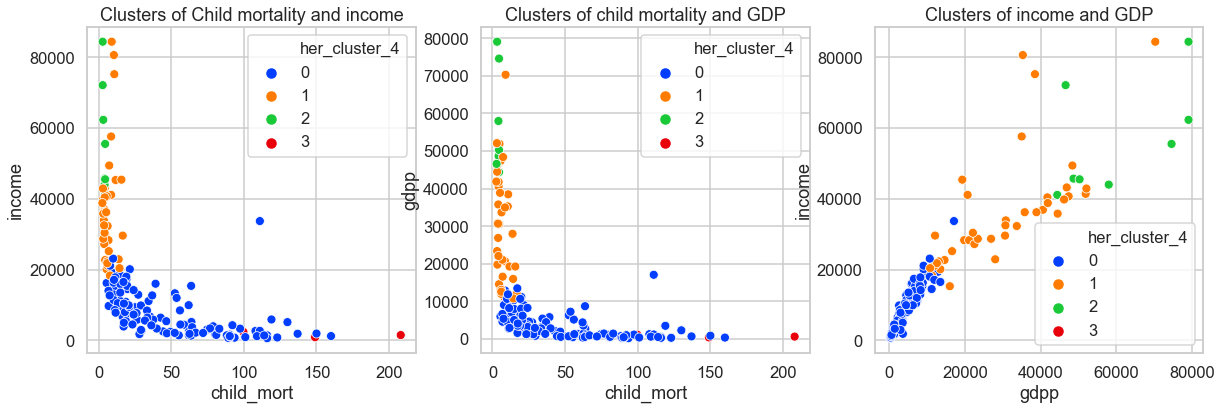

In [76]:
# EDA on the newly formed clusters considering variables child_mort, income and gdpp
fig, axes = plt.subplots(1,3, figsize=(20,6))
plt.subplot(1,3,1)
sns.scatterplot(x='child_mort', y='income', hue='her_cluster_4',data=df_her,palette='bright')
plt.title('Clusters of Child mortality and income')
plt.subplot(1,3,2)
sns.scatterplot(x='child_mort', y='gdpp', hue='her_cluster_4',data=df_her,palette='bright')
plt.title('Clusters of child mortality and GDP')
plt.subplot(1,3,3)
sns.scatterplot(x='gdpp', y='income', hue='her_cluster_4',data=df_her,palette='bright')
plt.title('Clusters of income and GDP')
plt.show()

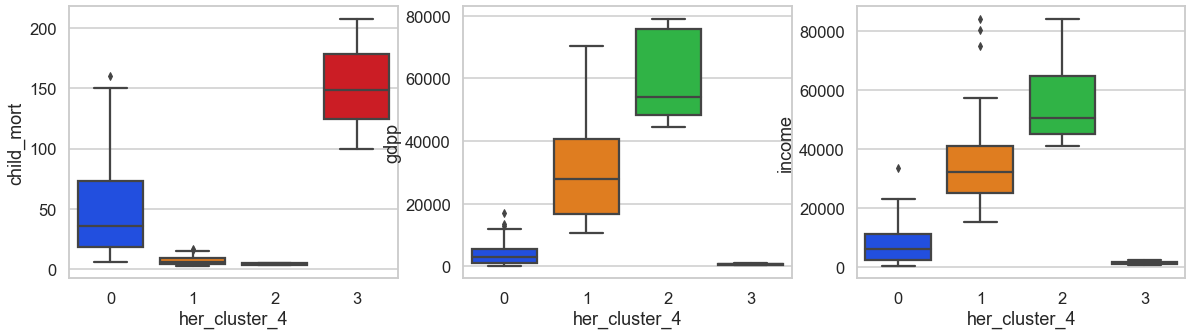

In [77]:
# Box plot on various features against the clusters to visualize the spread of the data

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='her_cluster_4', y='child_mort', data=df_her, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='her_cluster_4', y='gdpp', data=df_her, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='her_cluster_4', y='income', data=df_her, palette="bright")

plt.show()

## 5.2.3. Hierarchical Clustering with k=3

In [78]:
# now we consider a threshold value of 10 and divide the data into 3 clusters
her_cluster_3 = cut_tree(mergings_c, n_clusters=3).reshape(-1, )
her_cluster_3

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [79]:
df_her['her_cluster_3'] = her_cluster_3
df_her.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,her_cluster_4,her_cluster_3
country,,,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,0
Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,0
Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1,1


In [80]:
# assign cluster labels
df_her['her_cluster_3'].value_counts()

0    118
1     41
2      8
Name: her_cluster_3, dtype: int64

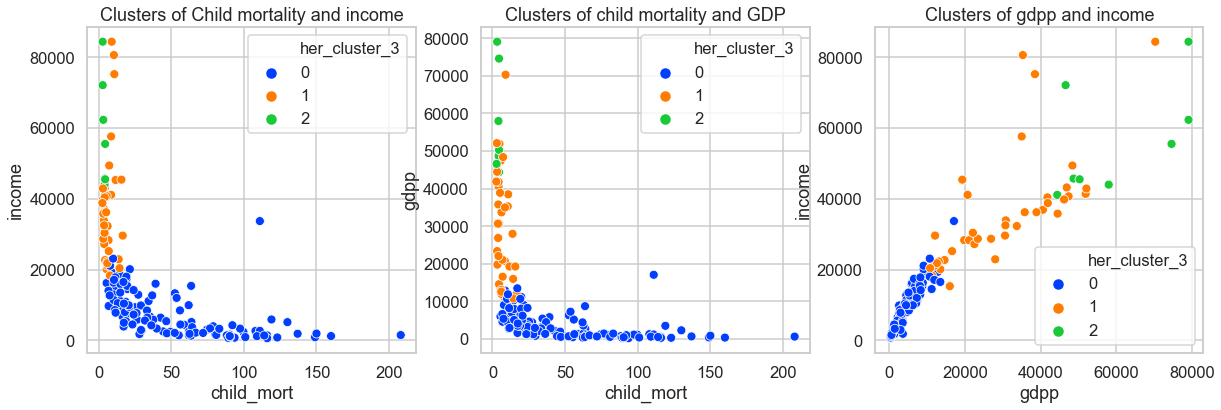

In [81]:
# EDA on the newly formed clusters considering variables child_mort, income and gdpp
fig, axes = plt.subplots(1,3, figsize=(20,6))
plt.subplot(1,3,1)
sns.scatterplot(x='child_mort', y='income', hue='her_cluster_3',data=df_her,palette='bright')
plt.title('Clusters of Child mortality and income')
plt.subplot(1,3,2)
sns.scatterplot(x='child_mort', y='gdpp', hue='her_cluster_3',data=df_her,palette='bright')
plt.title('Clusters of child mortality and GDP')
plt.subplot(1,3,3)
sns.scatterplot(x='gdpp', y='income', hue='her_cluster_3',data=df_her,palette='bright')
plt.title('Clusters of gdpp and income')
plt.show()

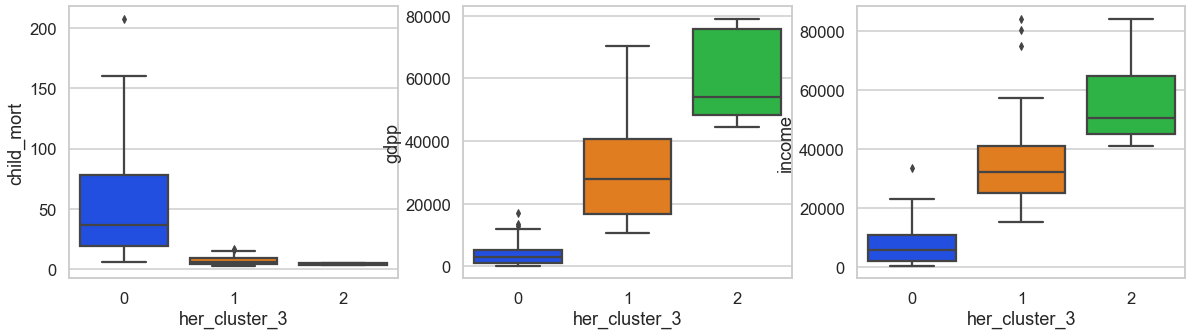

In [82]:
# EDA on the newly formed clusters considering variables child_mort, income and gdpp
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='her_cluster_3', y='child_mort', data=df_her, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='her_cluster_3', y='gdpp', data=df_her, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='her_cluster_3', y='income', data=df_her, palette="bright")

plt.show()

##### Inference
- From the above analysis we can infer that 3 is the optimal number of clusters required to segment the data
- So, for the final model, we will consider 3 clusters

# 5.2.4. Hierarchical Model interpretation with k=3

In [83]:
# Renaming the clusters for better interpretation
df_her.loc[df_her['her_cluster_3'] == 0,'her_cluster_3'] ='Under-Develop Country'
df_her.loc[df_her['her_cluster_3'] == 1,'her_cluster_3'] ='Developing Country'
df_her.loc[df_her['her_cluster_3'] == 2,'her_cluster_3'] ='Developed Country'

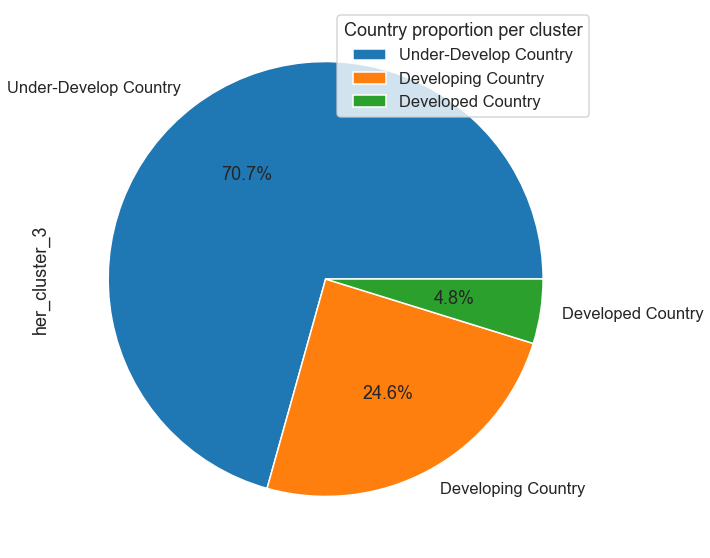

In [84]:
# Vizualising the Cluster
plt.figure(figsize=[15,10])
df_her["her_cluster_3"].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.legend(title = "Country proportion per cluster")
plt.show()

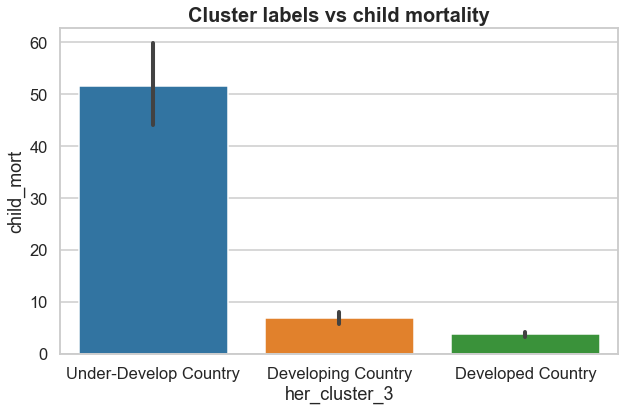

In [85]:
plt.figure(figsize = (10,6))
sns.barplot(x='her_cluster_3', y='child_mort', data=df_her)
plt.title('Cluster labels vs child mortality',fontweight="bold", size=20)

plt.show()

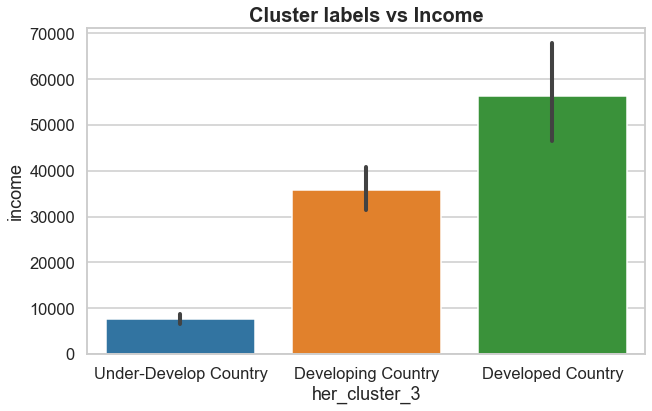

In [86]:
plt.figure(figsize = (10,6))
sns.barplot(x='her_cluster_3', y='income', data=df_her)
plt.title('Cluster labels vs Income',fontweight="bold", size=20)

plt.show()

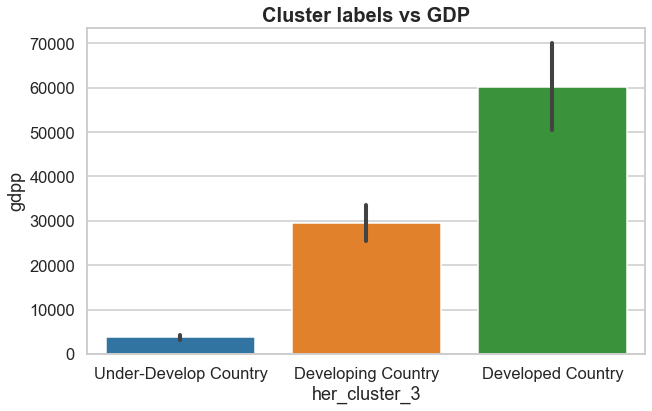

In [87]:
# plots
plt.figure(figsize = (10,6))
sns.barplot(x='her_cluster_3', y='gdpp', data=df_her)
plt.title('Cluster labels vs GDP',fontweight="bold", size=20)

plt.show()

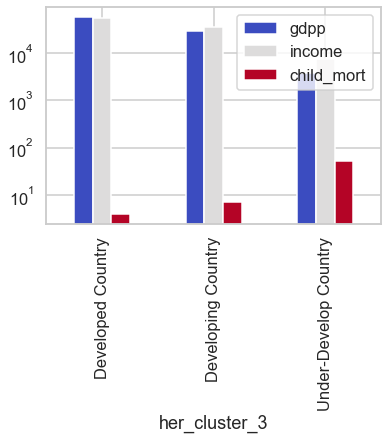

In [88]:
grouped_df = df_her[['gdpp', 'income', 'child_mort','her_cluster_3']].groupby('her_cluster_3').mean() 
grouped_df.plot(kind='bar',logy=True, colormap='coolwarm')    
plt.show()

##### Inference
- Cluster 0 : Those countries which are Under-developed as these countries has Low GDP ,Low Income and High Child mortality rate.
- Cluster 1 : Those countries which are Developing country as these countries has Medium GDP, Medium Income and Medium Child mortality rate.
- Cluster 2 : Those countries which are Developed country as these countries has High GDP ,High Income and Low Child morality rate

# 5.2.5.  Hierarchical clustering conclusion

In [91]:
H_top5 = df_her[df_her['her_cluster_3'] == "Under-Develop Country"].sort_values(by = ['gdpp','child_mort','income'], ascending = [True, False, True]).head()
H_top5

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,her_cluster_4,her_cluster_3
country,,,,,,,,,,,
Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,0,Under-Develop Country
Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,0,Under-Develop Country
"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,0,Under-Develop Country
Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,0,Under-Develop Country
Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,0,Under-Develop Country


In [92]:
print('Top 5 countries in need of aid according to hierarchical clustering are:')
H_top5.head()

Top 5 countries in need of aid according to hierarchical clustering are:


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,her_cluster_4,her_cluster_3
country,,,,,,,,,,,
Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,0,Under-Develop Country
Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,0,Under-Develop Country
"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,0,Under-Develop Country
Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,0,Under-Develop Country
Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,0,Under-Develop Country


##### Inference: 
- The top 5 countries which are in need of aid according to hierarchical clustering are:
   - Burundi
   - Liberia
   - Congo, Dem. Rep.
   - Niger
   - Sierra Leone

- The top 5 countries which are in need of aid according to k-means clustering are:
 - Burundi
 - Liberia
 - Congo, Dem. Rep.
 - Niger
 - Sierra Leone



##### We can see that after performing clustering by both k-means and hierarchical clustering, the top 5 countries in need of aid are the same.
